# DOPP Ex 2 - Question 28 - Food in the EU

## Group 04
- #### Anna Laczkó: 12347556
- #### Ghazal Arzanian: 
- #### Bosse Behrens: 12347333
- #### Marcell Szekrenyes: 12347300

# 1. Introduction


Food is a vital part of culture, health, and the economy, making it an essential area of study. This project focuses on understanding food consumption and trade across Europe, examining how these areas are interconnected and how they influence our lives on multiple levels, from individual well-being to national economic performance. By investigating these relationships, we aim to uncover patterns and insights that shed light on the broader implications of food systems in Europe. Guided by the assignment's broader questions on this topic, we refined our focus to explore specific, well-defined questions. These questions are designed to help us dive deeper into how food consumption varies across regions, the role of trade in shaping these patterns, and the ways in which health and economic indicators are relatedd.

#### Our investigation is centered around the following key questions:

1. What are differences and similarities in food consumption/diets across European countries and regions?

2. What types of foods are mainly exported/imported in a specific country?

3. How import and export will change over time for each country?

4. Relationships between food consumption and health:
    - Is there a relationship between life expectancy and food consumption?
    - Is there a relationship between the prevalence of diabetes and food consumption?
    - Is there a relationship between the obesity rate and food consumption?

5. Relationships between food consumption and economic indicators:
    - Is there a relationship between the amount and types of food exported/imported and food consumption?
    - Is there a relationship between the GDP per capita and food consumption?
    - Is there a relationship between the GDP per capita and the amount and type of food exported/imported?

6. Can we use machine learning to obtain information about which types of food contribute the most to obesity and life expectancy?

7. Can we predict GDP per capita based on the mean life expectancy and Import/Export metrics of a given country in the EU

These questions are valuable because they allow us to explore the complex relationships between food consumption, trade, health, and economics in Europe. By examining differences in diets across countries and regions, we gain insights into cultural and economic diversity. Understanding trade patterns, such as which foods are primarily exported or imported and how trade evolves over time, helps us assess economic dependencies and market trends.

We also investigate how food consumption impacts health indicators like life expectancy, diabetes, and obesity, enabling targeted interventions for public health. Exploring the connections between GDP, food consumption, and trade reveals how economic factors shape dietary habits and vice versa. Using machine learning, we can identify which foods contribute most to health outcomes and even predict GDP based on health and trade metrics. Together, these questions provide a framework to inform policies, improve public health, and enhance the sustainability of food systems across Europe.
To address these questions, we’ll gather and process datasets on food consumption, imports, exports, health metrics, and economic indicators.  We chose this data to take extra care to select datasets from official EU/UN institutions and other trusted sources to ensure their integrity and reliability. Our first step will be to clean and organize the data, ensuring it is in the right format and prepared for analysis. We will then explore the data in depth, identifying trends, patterns, and relationships that helps us answer some of our questions. Afterwards we make an attempt to answer the last two questions using Machine Learning. Finally, we’ll assess the accuracy and reliability of our findings.

#### Our selected datasets:
 - Trade (Import/export) dataset: https://www.fao.org/faostat/en/#data/TCL (Food and Agriculture Organization of the United Nations)
 - Life expectancy dataset: https://ec.europa.eu/eurostat/databrowser/view/demo_mlexpec/default/bar?lang=en (EUROSTAT)
 - GDP per capita dataset: https://ec.europa.eu/eurostat/databrowser/view/sdg_10_10/default/table?lang=en (EUROSTAT)
 - Food consumption dataset: https://www.efsa.europa.eu/en/microstrategy/food-consumption-survey (European Food Safety Authority)
 - Obesity dataset: https://ec.europa.eu/eurostat/databrowser/view/ilc_hch10/default/table?lang=en (EUROSTAT)
 - Diebetes dataset: https://diabetesatlas.org/data/en/indicators/2/ (International Diabetes Federation)

# 2. Preprocessing datasets

#### Understanding what is the data

We start with the three aforementioned raw datasets. First the trade data is a measurement so no problems there. It contains the import/export quantity in tons and value in 1000$ for all European countries for multiple categories of food in the timespan of 2000 to 2023. Next are the datasets with the obesity and diabetes prevalence in % in European coutnries in the year 2021 for diabetes and 2023 for obesity. These are obviously not completely exact measurements but drawn samples from the population and then using statsitical inference methods. Since they were both done by official organizations (EU/Internaitonal Diabetes Federation) they should be very good and similar to exact measurements. The GDP per capita (adjusted by purchasing power) dataset is from EUROSTAT (EU) as well and obtained by acurately calculating the GDP and then adjusting it by purchasing power and therefore should also be acurate. The life expectancy (at birth) dataset is obviously no exact measurement since this is not possible, but it is again from EUROSTAT and therefore should begood and unbiased. Both contain again valeus for all European countries, in the years 2000 to 2023. This leaves the food consumption dataset. This gave us the most problems as we will see. Since this is our most important dataset and most of our research objectives and questions involve this, we have to point potential biases out. The dataset contains values of different food categories eaten in g/day. It contains multiple statistical measurement like mean, median, quantiles, etc. for different coutnries and different age groups as well as the number of subjects. This dataset stems from surveys done in all the countries incldued. A big potential risk in bias stems from the different years of the surveys as well as the number. In some countries multiple surveys were done, in some only one. Then also some surveys are from 2015, some from 2020. Furtehrmore some surveys have around 200 participants, some 2000. there is also not really much info provided on data provenance, e.g. who did the surveys? What were the survey methods? Where exactly were the surveys done? Sadly for specific food consumption there aren't any other sources for data so we had to chose this. It is provided by the European Food Safety Authority so we can only trust that they provide acceptable data. Potential biases in this data can not be ruled out though.

#### Preprocessing steps

    - loading and cleaning the datasets
    - checking and handling missing values
    - merging datasets


We have three time-series datasets: import/export, GDP/capita and life expectancy. We will follow the steps and then merge them.
The others are not time-series sets. Diabetes and obesity are from 2021 and 2023 respectively, while the food consumption dataset's surveys it is based on differ in time as beforementioned, but often there only exists one. We therefore make the possibly too simplistic assumption that this data didn't change much over the years and is representative for each country. Furtehrmore we extarct they life expectancy only for 2023 and then merge these four non-time series datasets on the country.

## 2.1 Preprocessing Time-series Data

### 2.1.1 Loading and cleaning import/export dataset

In [219]:
import pandas as pd
import numpy as np

df_trade = pd.read_csv('./raw/Exports and Imports/FAOSTAT_data_en_1-26-2025.csv')

First we inspect the data.

In [220]:
df_trade.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,8,Albania,5622,Import value,F1888,Cereals and Preparations,2000,2000,1000 USD,68199.0,A,Official figure,NaN
1,TCL,Crops and livestock products,8,Albania,5922,Export value,F1888,Cereals and Preparations,2000,2000,1000 USD,301.0,A,Official figure,NaN
2,TCL,Crops and livestock products,8,Albania,5622,Import value,F1888,Cereals and Preparations,2001,2001,1000 USD,69929.0,A,Official figure,NaN
3,TCL,Crops and livestock products,8,Albania,5922,Export value,F1888,Cereals and Preparations,2001,2001,1000 USD,204.0,A,Official figure,NaN
4,TCL,Crops and livestock products,8,Albania,5622,Import value,F1888,Cereals and Preparations,2002,2002,1000 USD,82251.0,A,Official figure,NaN


First we want to do some renaming of the coutnries to keep consistency with the other datasets.

In [221]:
df_trade['Area'] = df_trade['Area'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Netherlands (Kingdom of the)': 'Netherlands'
})

In order to answer our defined questions, the best format for the data would be a df where each country has a row for each year and each food category is in a separate column. This way we can make more meaningful data exploration and the data would be in a format that is more suitable to analyze the changes within countries over the years and also between countries over the years. Another interesting topic could be differences based on geography. For example to compare countries with access and without access to see. Since this study is only focusing on food, we can drop the Domain column as it holds no new information to us as well as the other technical columns.

In [222]:
import pandas as pd

df_pivot_trade = pd.pivot_table(
    df_trade,
    values='Value',
    index=['Year', 'Area'],
    columns=['Item', 'Element'],
    aggfunc='first',
    fill_value=0
)


categories_to_drop = ['Dairy Products and Eggs', 'Cereals and Preparations', 'Fruit and Vegetables']

df_pivot_trade = df_pivot_trade[[col for col in df_pivot_trade.columns if col[0] not in categories_to_drop]]
df_pivot_trade.head()

Item                        Alcoholic Beverages                               \
Element                         Export quantity Export value Import quantity   
Year Area                                                                      
2000 Albania                              26.00        35.00        33354.00   
     Austria                           90143.94     77874.50       128485.54   
     Belarus                           57176.81     29353.16        29365.93   
     Belgium                          525388.75    598481.10       516822.85   
     Bosnia and Herzegovina              806.00       662.00        44800.00   

Item                                     Animal Fats and Oils (excl. Butter)  \
Element                     Import value                     Export quantity   
Year Area                                                                      
2000 Albania                    12533.00                                 0.0   
     Austria                   207982.98                             40900.0   
     Belarus                    41766.63                                 0.0   
     Belgium                  1001198.63                            125288.0   
     Bosnia and Herzegovina     20000.00                                 0.0   

Item                                                                   \
Element                     Export value Import quantity Import value   
Year Area                                                               
2000 Albania                        0.00          2026.0       726.00   
     Austria                     7053.97         17564.0     10439.57   
     Belarus                        0.00          7525.0      5085.00   
     Belgium                    64688.79        198198.0     70438.04   
     Bosnia and Herzegovina         0.00          1510.0      1210.00   

Item                              Beverages               ... Sugar and Honey  \
Element                     Export quantity Export value  ... Import quantity   
Year Area                                                 ...                   
2000 Albania                        3510.00      1030.00  ...         59993.0   
     Austria                      564449.14    644552.82  ...        346655.0   
     Belarus                       78876.81     32653.16  ...        515674.0   
     Belgium                     1434286.25   1001300.20  ...       1278410.0   
     Bosnia and Herzegovina         2421.00      1888.00  ...         76705.0   

Item                                     Vegetable Oil and Fat               \
Element                     Import value       Export quantity Export value   
Year Area                                                                     
2000 Albania                    15406.00                  39.0        45.00   
     Austria                   144864.15               60547.0     31219.85   
     Belarus                   128514.00               11041.0      8799.60   
     Belgium                   486407.90             1094152.0    582868.96   
     Bosnia and Herzegovina     22475.00                8000.0      8500.00   

Item                                                          Vegetables  \
Element                     Import quantity Import value Export quantity   
Year Area                                                                  
2000 Albania                        35803.0     20150.00           789.0   
     Austria                       106204.0     68150.16        138774.0   
     Belarus                        91570.0     70298.00         39305.0   
     Belgium                       996817.0    491119.35       1843019.0   
     Bosnia and Herzegovina         61229.0     54193.00          1623.0   

Item                                                                   
Element                     Export value Import quantity Import value  
Year Area                                                              
2000 Albania              

We check for missing values.

In [223]:
print(df_pivot_trade.isnull().sum().sum())

0


A second version of the dataset without the multiindex.

In [224]:
df_pivot_trade_reset = df_pivot_trade.reset_index()

unique_countries = df_pivot_trade_reset['Area'].unique()
unique_countries

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Republic of Moldova', 'Romania', 'Russian Federation',
       'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United Kingdom', 'Montenegro', 'Serbia'],
      dtype=object)

In [225]:
df_pivot_trade_reset.head()

Item     Year                    Area Alcoholic Beverages               \
Element                                   Export quantity Export value   
0        2000                 Albania               26.00        35.00   
1        2000                 Austria            90143.94     77874.50   
2        2000                 Belarus            57176.81     29353.16   
3        2000                 Belgium           525388.75    598481.10   
4        2000  Bosnia and Herzegovina              806.00       662.00   

Item                                 Animal Fats and Oils (excl. Butter)  \
Element Import quantity Import value                     Export quantity   
0              33354.00     12533.00                                 0.0   
1             128485.54    207982.98                             40900.0   
2              29365.93     41766.63                                 0.0   
3             516822.85   1001198.63                            125288.0   
4              44800.00     20000.00                                 0.0   

Item                                               ... Sugar and Honey  \
Element Export value Import quantity Import value  ... Import quantity   
0               0.00          2026.0       726.00  ...         59993.0   
1            7053.97         17564.0     10439.57  ...        346655.0   
2               0.00          7525.0      5085.00  ...        515674.0   
3           64688.79        198198.0     70438.04  ...       1278410.0   
4               0.00          1510.0      1210.00  ...         76705.0   

Item                 Vegetable Oil and Fat                               \
Element Import value       Export quantity Export value Import quantity   
0           15406.00                  39.0        45.00         35803.0   
1          144864.15               60547.0     31219.85        106204.0   
2          128514.00               11041.0      8799.60         91570.0   
3          486407.90             1094152.0    582868.96        996817.0   
4           22475.00                8000.0      8500.00         61229.0   

Item                      Vegetables                                            
Element Import value Export quantity Export value Import quantity Import value  
0           20150.00           789.0       514.00         21762.0      6589.00  
1           68150.16        138774.0     82134.06        327111.2    307966.59  
2           70298.00         39305.0     23043.19         34685.0     21258.00  
3          491119.35       1843019.0   1264588.71       1330753.0    700342.41  
4           54193.00          1623.0      4050.00         20570.0      8710.00  

[5 rows x 90 columns]

Let's save the datasets into csv files.

In [226]:
output_file = "data/df_pivot_trade_multiindexed.csv"
df_pivot_trade.to_csv(output_file, index=False)

output_file = "data/df_pivot_trade.csv"
df_pivot_trade_reset.to_csv(output_file, index=False)

### 2.1.2 Loading and cleaning life expectancy dataset

First we again load and inspect the data.

In [227]:
df_life = pd.read_csv('./raw/Life Expectancy/demo_mlexp.csv', encoding='cp1252', sep=';', na_values=[''])
df_life

,TIME,2000,Unnamed: 2,2001,Unnamed: 4,2002,Unnamed: 6,2003,Unnamed: 8,2004,...,2019,Unnamed: 40,2020,Unnamed: 42,2021,Unnamed: 44,2022,Unnamed: 46,2023,Unnamed: 48
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,77.9,NaN,78.1,NaN,78.2,NaN,78.3,NaN,79,...,82.1,NaN,80.8,NaN,81.9,NaN,81.8,NaN,82.5,ip
2,Bulgaria,71.6,NaN,71.9,NaN,72.1,NaN,72.3,NaN,72.5,...,75.1,NaN,73.3,NaN,71.2,NaN,74.2,b,75.8,ip
3,Czechia,75.1,NaN,75.3,NaN,75.4,NaN,75.3,NaN,75.9,...,79.3,NaN,78.3,NaN,77.2,b,79,NaN,80,ip
4,Denmark,76.9,NaN,77,NaN,77.1,NaN,77.4,NaN,77.8,...,81.5,NaN,81.6,NaN,81.5,NaN,81.3,NaN,81.9,ip
5,Germany,78.3,NaN,78.6,NaN,78.6,NaN,78.6,NaN,79.3,...,81.3,NaN,81.1,NaN,80.8,NaN,80.7,NaN,81.2,ip
6,Estonia,71.1,NaN,70.9,NaN,71.4,NaN,71.9,NaN,72.4,...,79,NaN,78.9,NaN,77.2,NaN,78.1,NaN,78.8,ip
7,Ireland,76.6,NaN,77.2,NaN,77.7,NaN,78.2,NaN,78.6,...,82.8,e,82.5,b,82.3,NaN,82.6,NaN,:,NaN
8,Greece,78.6,NaN,79.1,NaN,79.2,NaN,79.3,NaN,79.4,...,81.7,NaN,81.4,NaN,80.2,NaN,80.8,NaN,81.6,ip
9,Spain,79.3,NaN,79.8,NaN,79.8,NaN,79.7,NaN,80.4,...,84,NaN,82.3,b,83.3,NaN,83.2,NaN,84,ip


Now let's clean up the data. As a first step we remove the unnecessary empty columns and any countries that are not in Europe.

In [228]:
df_life = df_life.loc[:, ~df_life.columns.str.contains('Unnamed')]
df_life = df_life.iloc[1:] 

df_life

,TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Belgium,77.9,78.1,78.2,78.3,79,79.1,79.5,79.9,79.8,...,81.4,81.1,81.5,81.6,81.7,82.1,80.8,81.9,81.8,82.5
2,Bulgaria,71.6,71.9,72.1,72.3,72.5,72.5,72.7,73,73.3,...,74.5,74.7,74.9,74.8,75,75.1,73.3,71.2,74.2,75.8
3,Czechia,75.1,75.3,75.4,75.3,75.9,76.1,76.7,77,77.3,...,78.9,78.7,79.1,79.1,79.1,79.3,78.3,77.2,79,80
4,Denmark,76.9,77,77.1,77.4,77.8,78.3,78.4,78.4,78.8,...,80.7,80.8,80.9,81.1,81,81.5,81.6,81.5,81.3,81.9
5,Germany,78.3,78.6,78.6,78.6,79.3,79.4,79.9,80.1,80.2,...,81.2,80.7,81,81.1,81,81.3,81.1,80.8,80.7,81.2
6,Estonia,71.1,70.9,71.4,71.9,72.4,73,73.2,73.2,74.4,...,77.4,78,78,78.4,78.5,79,78.9,77.2,78.1,78.8
7,Ireland,76.6,77.2,77.7,78.2,78.6,79,79.3,79.7,80.2,...,81.4,81.5,81.7,82.2,82.2,82.8,82.5,82.3,82.6,:
8,Greece,78.6,79.1,79.2,79.3,79.4,79.6,79.9,79.7,80.2,...,81.5,81.1,81.5,81.4,81.9,81.7,81.4,80.2,80.8,81.6
9,Spain,79.3,79.8,79.8,79.7,80.4,80.3,81.1,81.1,81.5,...,83.3,83,83.5,83.4,83.5,84,82.3,83.3,83.2,84
10,France,79.2,79.3,79.4,79.3,80.3,80.3,80.9,81.3,81.4,...,82.9,82.4,82.7,82.7,82.8,83,82.3,82.4,82.3,83.1


We now check for missing vlaues.

In [229]:
df_life.replace(':', np.nan, inplace=True)

print(df_life.isnull().sum().sum())

61


Now we clean up the missing values. Since in most of the countries not that many values are missing, we can impute the data. For this we calculate the average change of life expectany in the given country over the observation period and use this to inpute the missing values. This is in our opinion a good choice because it preserves trends whiel also keeping coutnry-specific dynamics. Also using the average annual change for both forward and backward imputation allows us to estimate missing values based on adjacent years, ensuring continuity and consistency in the time series.

In [230]:
import numpy as np


year_cols = [str(year) for year in range(2000, 2024)]
df_life[year_cols] = df_life[year_cols].replace('...', np.nan)
df_life[year_cols] = df_life[year_cols].apply(pd.to_numeric, errors='coerce')

def impute_country_data(row):
    values = row[year_cols].copy()
    deltas = []
    for i in range(1, len(values)):
        prev = values.iloc[i - 1]
        curr = values.iloc[i]
        if not np.isnan(prev) and not np.isnan(curr):
            deltas.append(curr - prev)

    if not deltas:
        return row

    avg_delta = np.mean(deltas)
    for i in range(1, len(values)):
        if np.isnan(values.iloc[i]) and not np.isnan(values.iloc[i - 1]):
            values.iloc[i] = values.iloc[i - 1] + avg_delta
            
    for i in range(len(values) - 2, -1, -1):
        if np.isnan(values.iloc[i]) and not np.isnan(values.iloc[i + 1]):
            values.iloc[i] = values.iloc[i + 1] - avg_delta

    row[year_cols] = values
    return row

df_imputed = df_life.apply(impute_country_data, axis=1)
df_imputed[year_cols] = df_imputed[year_cols].round(1)
df_imputed

,TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Belgium,77.9,78.1,78.2,78.3,79.0,79.1,79.5,79.9,79.8,...,81.4,81.1,81.5,81.6,81.7,82.1,80.8,81.9,81.8,82.5
2,Bulgaria,71.6,71.9,72.1,72.3,72.5,72.5,72.7,73.0,73.3,...,74.5,74.7,74.9,74.8,75.0,75.1,73.3,71.2,74.2,75.8
3,Czechia,75.1,75.3,75.4,75.3,75.9,76.1,76.7,77.0,77.3,...,78.9,78.7,79.1,79.1,79.1,79.3,78.3,77.2,79.0,80.0
4,Denmark,76.9,77.0,77.1,77.4,77.8,78.3,78.4,78.4,78.8,...,80.7,80.8,80.9,81.1,81.0,81.5,81.6,81.5,81.3,81.9
5,Germany,78.3,78.6,78.6,78.6,79.3,79.4,79.9,80.1,80.2,...,81.2,80.7,81.0,81.1,81.0,81.3,81.1,80.8,80.7,81.2
6,Estonia,71.1,70.9,71.4,71.9,72.4,73.0,73.2,73.2,74.4,...,77.4,78.0,78.0,78.4,78.5,79.0,78.9,77.2,78.1,78.8
7,Ireland,76.6,77.2,77.7,78.2,78.6,79.0,79.3,79.7,80.2,...,81.4,81.5,81.7,82.2,82.2,82.8,82.5,82.3,82.6,82.9
8,Greece,78.6,79.1,79.2,79.3,79.4,79.6,79.9,79.7,80.2,...,81.5,81.1,81.5,81.4,81.9,81.7,81.4,80.2,80.8,81.6
9,Spain,79.3,79.8,79.8,79.7,80.4,80.3,81.1,81.1,81.5,...,83.3,83.0,83.5,83.4,83.5,84.0,82.3,83.3,83.2,84.0
10,France,79.2,79.3,79.4,79.3,80.3,80.3,80.9,81.3,81.4,...,82.9,82.4,82.7,82.7,82.8,83.0,82.3,82.4,82.3,83.1


Now let's create another df with the same data but in a format that's more compatible with the gdp and trade data, meaning pivoting it from wide to long data.

In [231]:
df_long = df_imputed.melt(
    id_vars=['TIME'], 
    value_vars=year_cols,
    var_name='Year',
    value_name='Life Expectancy'
)

df_long = df_long.rename(columns={'TIME': 'Area'})
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long.sort_values(['Area', 'Year']).reset_index(drop=True)

df_long['Life Expectancy'] = df_long['Life Expectancy'].round(1)

df_long_life = df_long
df_long_life.head()

,Area,Year,Life Expectancy
0,Albania,2000,76.2
1,Albania,2001,76.3
2,Albania,2002,76.4
3,Albania,2003,76.6
4,Albania,2004,76.7


Now we save it into a csv.

In [232]:
output_file = "data/df_long_life.csv"
df_long_life.to_csv(output_file, index=False)

### 2.1.3 Loading and cleaning gdp per capita dataset

First we again inspect the data.

In [233]:
df_gdp = pd.read_excel("raw/GDP/sdg_10_10_page_spreadsheet.xlsx",skiprows=9)
df_gdp.head()

,TIME,2000,Unnamed: 2,2001,Unnamed: 4,2002,Unnamed: 6,2003,Unnamed: 8,2004,...,2019,Unnamed: 40,2020,Unnamed: 42,2021,Unnamed: 44,2022,Unnamed: 46,2023,Unnamed: 48
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),18400,NaN,19300,NaN,19900,NaN,20400,NaN,21300,...,31600.0,NaN,30400.0,NaN,33200,NaN,36000,NaN,38100,NaN
2,European Union - 28 countries (2013-2020),18900,NaN,19700,NaN,20400,NaN,20900,NaN,21900,...,31700.0,NaN,30500.0,NaN,:,NaN,:,NaN,:,NaN
3,European Union - 27 countries (2007-2013),18900,NaN,19800,NaN,20500,NaN,21000,NaN,21900,...,31800.0,NaN,30600.0,NaN,:,NaN,:,NaN,:,NaN
4,Euro area – 20 countries (from 2023),21000,NaN,21900,NaN,22500,NaN,23000,NaN,23800,...,33400.0,NaN,31800.0,NaN,34600,NaN,37600,NaN,39800,NaN


Drop empty columns and rows. We also remove columns that are not single European coutnries but aggregates or non-European.

In [234]:
df_gdp = df_gdp.dropna(how='all', axis=0)
df_gdp = df_gdp.dropna(how='all', axis=1)

df_gdp.rename(columns={df_gdp.columns[0]: 'Country'}, inplace=True)

df_gdp = df_gdp.iloc[6:, :]
df_gdp = df_gdp.iloc[:-7, :]

df_gdp = df_gdp.iloc[:, :-1]

output_file = "data/cleaned_gdp_data.csv"
df_gdp.to_csv(output_file, index=False)

df_gdp.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
6,Belgium,23100,23800,24800,25400,26200,27200,28000.0,29100.0,29400.0,...,32400.0,33100.0,33600.0,34500.0,35600.0,36900.0,35800.0,38700,42700,44900
7,Bulgaria,5300,5800,6400,6900,7500,8300,9000.0,10000.0,10900.0,...,12900.0,13600.0,14400.0,15300.0,16300.0,17400.0,17500.0,19800,22500,24300
8,Czechia,13500,14600,15000,16100,17100,18100,19000.0,20700.0,21600.0,...,23500.0,24600.0,25400.0,27200.0,28500.0,30000.0,29200.0,30500,32200,34500
9,Denmark,23800,24400,25100,25400,27000,28000,29700.0,30900.0,32200.0,...,34300.0,35200.0,36000.0,38000.0,38800.0,39400.0,40100.0,44500,48500,47800
10,Germany,23000,24000,24500,25200,26300,26800,28000.0,29600.0,30300.0,...,34400.0,34900.0,35800.0,37200.0,38200.0,38500.0,37500.0,39900,42400,44200


We check for missing values.

In [235]:
df_gdp.isna().sum().sum()

0

Transform the df in the format of the other datasets for later merge, meaning again pivoting from wide to long data.

In [236]:
df_gdp_long = df_gdp.melt(
    id_vars='Country',
    var_name='Year',
    value_name='GDP_PC'
)

df_gdp_long['Year'] = df_gdp_long['Year'].astype(int)

df_gdp_long = df_gdp_long.sort_values(by=['Country', 'Year']).reset_index(drop=True)
df_gdp_long.head()

,Country,Year,GDP_PC
0,Albania,2000,3200
1,Albania,2001,3600
2,Albania,2002,3800
3,Albania,2003,4100
4,Albania,2004,4400


Save into csv.

In [237]:
output_file = "data/df_long_gdp.csv"
df_gdp_long.to_csv(output_file, index=False)

### 2.1.4 Merging GDP, Trade and Life expectancy datasets

Now we want to merge the time-series data into one data set. We inner join on coutnry and year, so we only keep the countries for which data in all sets exists and no new missing data will be generated.

In [258]:
def merge_dataframes(df_pivot_trade, df_gdp_long, df_long_life):
    base_df = pd.merge(
        df_gdp_long,
        df_long_life,
        left_on=['Country', 'Year'],
        right_on=['Area', 'Year'],
        how='inner'
    )
    
    base_df['Country'] = base_df['Country'].fillna(base_df['Area'])
    base_df = base_df.drop('Area', axis=1)
    
    base_df.columns = pd.MultiIndex.from_tuples([('', col) for col in base_df.columns])
    
    final_df = pd.merge(
        base_df,
        df_pivot_trade,
        left_on=[('', 'Country'), ('', 'Year')],
        right_on=['Area', 'Year'],
        how='inner'
    )
    
    return final_df

df_gdp_life_trade = merge_dataframes(df_pivot_trade, df_gdp_long, df_long_life)
df_gdp_life_trade.head()

Alcoholic Beverages               \
   Country  Year GDP_PC Life Expectancy     Export quantity Export value   
0  Albania  2000   3200            76.2                26.0         35.0   
1  Albania  2001   3600            76.3                35.0         52.0   
2  Albania  2002   3800            76.4                70.0         64.0   
3  Albania  2003   4100            76.6               130.0        167.0   
4  Albania  2004   4400            76.7               320.0        265.0   

                               Animal Fats and Oils (excl. Butter)  \
  Import quantity Import value                     Export quantity   
0         33354.0      12533.0                                 0.0   
1         37187.0      15916.0                                 0.0   
2         29474.0      15730.0                                 0.0   
3         28265.0      18193.0                                 0.0   
4         24729.0      18678.0                                 0.0   

                ... Sugar and Honey              Vegetable Oil and Fat  \
  Export value  ... Import quantity Import value       Export quantity   
0          0.0  ...         59993.0      15406.0                  39.0   
1          0.0  ...         57437.0      15304.0                   5.0   
2          0.0  ...         67945.0      18361.0                  14.0   
3          0.0  ...         66291.0      18335.0                 200.0   
4          0.0  ...         83846.0      18776.0                 281.0   

                                                 Vegetables               \
  Export value Import quantity Import value Export quantity Export value   
0         45.0         35803.0      20150.0           789.0        514.0   
1          4.0         36855.0      18847.0           585.0        596.0   
2         11.0         34706.0      21262.0           972.0        724.0   
3        326.0         40214.0      28600.0          1116.0        502.0   
4        339.0         40055.0      32319.0          2003.0       1699.0   

                                
  Import quantity Import value  
0         21762.0       6589.0  
1         21847.0       8500.0  
2         33755.0      11428.0  
3         33928.0      13102.0  
4         23576.0      15339.0  

[5 rows x 92 columns]

In [ ]:
#output_file = "data/df_gdp_life_trade_merge.csv"
#df_gdp_life_trade.to_csv(output_file, index=False)

## 2.2 Preprocessing Time-static Data

### 2.2.1 Loading and cleaning food consumption dataset

First we inspect the data.

In [238]:
file_path = "raw/Food Consumption/consumption_g_perday.xlsx"  
df = pd.read_excel(file_path, header=2)
df.head()

C:\Users\ghaza\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Survey's country,Survey start year,Survey name,Population Group (L2),Exposure hierarchy (L1),Number of subjects,Number of consumers,Mean,Standard Deviation,5th percentile,10th percentile,Median,95th percentile,97.5th percentile,99th percentile,Comment
0,Austria,2010,Austrian Study on Nutritional Status 2010-12 -...,Adults,Alcoholic beverages,308,144,149.512987,280.610459,0.0,0.000000,0.000000,750.000000,888.322917,1117.673611,NaN
1,Austria,2010,Austrian Study on Nutritional Status 2010-12 -...,Adults,Animal and vegetable fats and oils and primary...,308,263,12.737159,11.559832,0.0,0.000000,10.122966,31.110981,34.969817,38.276099,NaN
2,Austria,2010,Austrian Study on Nutritional Status 2010-12 -...,Adults,"Coffee, cocoa, tea and infusions",308,282,455.261364,472.676201,0.0,60.872340,360.000000,1174.819149,1536.093972,2244.515248,NaN
3,Austria,2010,Austrian Study on Nutritional Status 2010-12 -...,Adults,Composite dishes,308,290,237.006981,162.496999,0.0,44.255862,215.062069,532.407276,590.102241,710.420966,NaN
4,Austria,2010,Austrian Study on Nutritional Status 2010-12 -...,Adults,Eggs and egg products,308,45,5.064935,14.186542,0.0,0.000000,0.000000,32.355556,32.500000,59.740000,NaN


As we can see there is a lot of information. We decided that a lot of it is not really helpful and just contributing to bad oversight and readability. We decided to work from here on only with the mean value as the best assumed estimator of the actual value. There was the argument if median might be betetr suited, but in some cases median would jsut be 0 if more than half of the survey takers answered negatively to consuming something. Furthermore the remaining statistical vlaues liek quantiles, as well as comment and survey name we dropped. Furthermore we also dropped the number of subjects and cosnuemrs. While these might hold valuable infroamtion, such as the rate of people actually consuming in a category, we decided that they do not help in answering our research questions and will jsut make further data handling unnecessarily complex.

In [239]:
columns_to_keep = ['Survey\'s country', 'Survey start year', 'Population Group (L2)', 
                   'Exposure hierarchy (L1)', 'Mean']

df_cleaned = df[columns_to_keep]
df_cleaned.head()

,Survey's country,Survey start year,Population Group (L2),Exposure hierarchy (L1),Mean
0,Austria,2010,Adults,Alcoholic beverages,149.512987
1,Austria,2010,Adults,Animal and vegetable fats and oils and primary...,12.737159
2,Austria,2010,Adults,"Coffee, cocoa, tea and infusions",455.261364
3,Austria,2010,Adults,Composite dishes,237.006981
4,Austria,2010,Adults,Eggs and egg products,5.064935


Now we want to handle the problem of some countries having surveys form multiple years. To solve this we simpley averaged the mean g/day consumed values grouped by country, age group and food category. We also drop the year then. As we mentioned earlier this has a risk of introducing potential bias, but there we didn't anther way to handle this.

In [240]:
df_grouped = df_cleaned.groupby(
    ["Survey's country", "Population Group (L2)", "Exposure hierarchy (L1)"], as_index=False
).agg({
    "Mean": "mean"     
})

df_grouped.head()

,Survey's country,Population Group (L2),Exposure hierarchy (L1),Mean
0,Austria,Adolescents,Alcoholic beverages,6.357224
1,Austria,Adolescents,Animal and vegetable fats and oils and primary...,16.355495
2,Austria,Adolescents,"Coffee, cocoa, tea and infusions",125.462767
3,Austria,Adolescents,Composite dishes,59.946303
4,Austria,Adolescents,Eggs and egg products,16.495834


Now the next questionw as how to handle the different age groups. We decided to explore each question seperately for each age group would be out of bounds for this projects in terms of time and scope. We therefore first check the groups.

In [241]:
unique_age_groups = df_grouped["Population Group (L2)"].unique()
print(unique_age_groups)

['Adolescents' 'Adults' 'Elderly' 'Other children' 'Pregnant women'
 'Very elderly' 'Toddlers' 'Infants' 'Lactating women' 'Vegetarians']


Now for Lactating women, Pregnant women and Vegetaraians there are only very few surveys done, so we discard those groups. Furtehrmore it was our decision to only have one group left. Aggregating the remaining groups is also not a good idea in our opinions sicne it owuld introduce unnecessary bias when aggregating over adults and children alike, also since this would mean for example that the consumption of alcoholic beverages would be biased way lower. Since adults make up the bulk of population we decided to only keep adults, elderly and very elderly and average the values over them for each country. 

In [242]:
age_groups_to_keep = ["Adults", "Elderly", "Very elderly"]

df_grouped = df_grouped[df_grouped["Population Group (L2)"].isin(age_groups_to_keep)]

df_grouped.head()

,Survey's country,Population Group (L2),Exposure hierarchy (L1),Mean
19,Austria,Adults,Alcoholic beverages,150.675344
20,Austria,Adults,Animal and vegetable fats and oils and primary...,14.828626
21,Austria,Adults,"Coffee, cocoa, tea and infusions",494.853665
22,Austria,Adults,Composite dishes,137.545469
23,Austria,Adults,Eggs and egg products,13.767620


Now we average over the age groups.

In [243]:
df_final = df_grouped.groupby(
    ["Survey's country", "Exposure hierarchy (L1)"], as_index=False
).agg({
    "Mean": "mean"         
})

df_final.head()

,Survey's country,Exposure hierarchy (L1),Mean
0,Austria,Alcoholic beverages,166.516408
1,Austria,Animal and vegetable fats and oils and primary...,17.191352
2,Austria,"Coffee, cocoa, tea and infusions",506.164903
3,Austria,Composite dishes,204.744410
4,Austria,Eggs and egg products,8.795674


And now we finally pivot from long to wide data since we want the food categories as columns and the countries as rows.

In [244]:
df_pivot = df_final.pivot(
    index="Survey's country", 
    columns="Exposure hierarchy (L1)",
    values="Mean"  
)


df_pivot = df_pivot.reset_index()


df_pivot.rename(columns={"Survey's country": "Country"}, inplace=True)
df_pivot.columns.name = None

df_pivot.head()

,Country,Alcoholic beverages,"Amphibians, reptiles, and terrestrial invertebrates",Animal and vegetable fats and oils and primary derivatives thereof,"Coffee, cocoa, tea and infusions",Composite dishes,Eggs and egg products,Fish and seafood,Food products for young population,Fruit and fruit products,...,"Major isolated ingredients, additives, flavours, baking and processing aids",Meat and meat products,Milk and dairy products,Other ingredients,"Products for non-standard diets, food imitates and food supplements","Seasoning, sauces and condiments","Starchy roots or tubers and products thereof, sugar plants","Sugar and similar, confectionery and water-based sweet desserts",Vegetables and vegetable products,Water and water-based beverages
0,Austria,166.516408,NaN,17.191352,506.164903,204.744410,8.795674,20.834679,NaN,151.713658,...,0.185394,88.061634,159.150887,NaN,4.772915,24.045274,25.532152,12.393363,106.405959,1147.504358
1,Belgium,176.182765,0.138166,38.234566,485.317295,139.873394,9.326120,25.907912,0.181111,149.255072,...,0.082624,119.521214,166.454963,NaN,6.447024,25.630590,106.421072,19.649948,134.006988,728.649289
2,Bosnia and Herzegovina,53.757918,NaN,18.483524,223.446471,4.099412,43.402229,14.369406,0.967059,130.164118,...,0.095088,151.848653,160.424712,NaN,0.712165,10.472947,68.152053,10.943894,148.532729,1157.601324
3,Croatia,104.608156,0.200416,20.455774,253.494776,2.102810,18.856405,21.400130,1.421579,169.739195,...,0.342856,138.512775,178.013741,0.01473,5.428320,11.213325,64.364645,9.852132,156.121909,974.833203
4,Cyprus,78.273638,0.009615,28.095809,164.615630,11.263452,14.164456,30.885233,0.459559,133.808601,...,0.935655,135.260535,198.019598,NaN,4.266961,5.162193,91.126593,9.250543,234.628936,1271.179959


Now we check for missing values.

In [245]:
missing_values = df_pivot.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

Amphibians, reptiles, and terrestrial invertebrates    13
Food products for young population                      6
Other ingredients                                      23
dtype: int64


We want to inspect the columns with missing data.

In [246]:
missing_values = df_pivot.isnull().sum()

columns_with_missing = missing_values[missing_values > 0]

columns_with_missing_data = df_pivot[columns_with_missing.index]
columns_with_missing_data.head()

,"Amphibians, reptiles, and terrestrial invertebrates",Food products for young population,Other ingredients
0,NaN,NaN,NaN
1,0.138166,0.181111,NaN
2,NaN,0.967059,NaN
3,0.200416,1.421579,0.01473
4,0.009615,0.459559,NaN


As we can see for Other ingredients all but three rows have missing data. The ones with data havbe very low values of <1g average consumption/day. For the other two columsn with missing data tehre are less missing values but the columns also have very low valeus in general. We therefore decide to drop Other ingredients since we also don't have any informaiton on what it contains and fill up the missing vlaues for the other two columns with zeros since they are so low anyway they won't ahve mcuh of an impact. Also we decided to drop the category Food products for young population since we also droped teh young age groups and this wouldn't make much sense to keep now with the valeus also being very low.

In [247]:
df_pivot['Amphibians, reptiles, and terrestrial invertebrates'] = (
    df_pivot['Amphibians, reptiles, and terrestrial invertebrates'].fillna(0)
)

df_food_consumption = df_pivot.drop(columns=['Other ingredients'])
df_food_consumption = df_food_consumption.drop(columns=['Food products for young population'])

df_food_consumption.head()

,Country,Alcoholic beverages,"Amphibians, reptiles, and terrestrial invertebrates",Animal and vegetable fats and oils and primary derivatives thereof,"Coffee, cocoa, tea and infusions",Composite dishes,Eggs and egg products,Fish and seafood,Fruit and fruit products,Fruit and vegetable juices and nectars (including concentrates),...,"Legumes, nuts, oilseeds and spices","Major isolated ingredients, additives, flavours, baking and processing aids",Meat and meat products,Milk and dairy products,"Products for non-standard diets, food imitates and food supplements","Seasoning, sauces and condiments","Starchy roots or tubers and products thereof, sugar plants","Sugar and similar, confectionery and water-based sweet desserts",Vegetables and vegetable products,Water and water-based beverages
0,Austria,166.516408,0.000000,17.191352,506.164903,204.744410,8.795674,20.834679,151.713658,68.205492,...,8.533545,0.185394,88.061634,159.150887,4.772915,24.045274,25.532152,12.393363,106.405959,1147.504358
1,Belgium,176.182765,0.138166,38.234566,485.317295,139.873394,9.326120,25.907912,149.255072,45.925900,...,7.046268,0.082624,119.521214,166.454963,6.447024,25.630590,106.421072,19.649948,134.006988,728.649289
2,Bosnia and Herzegovina,53.757918,0.000000,18.483524,223.446471,4.099412,43.402229,14.369406,130.164118,54.349265,...,13.370076,0.095088,151.848653,160.424712,0.712165,10.472947,68.152053,10.943894,148.532729,1157.601324
3,Croatia,104.608156,0.200416,20.455774,253.494776,2.102810,18.856405,21.400130,169.739195,17.702988,...,15.318629,0.342856,138.512775,178.013741,5.428320,11.213325,64.364645,9.852132,156.121909,974.833203
4,Cyprus,78.273638,0.009615,28.095809,164.615630,11.263452,14.164456,30.885233,133.808601,40.931410,...,23.069827,0.935655,135.260535,198.019598,4.266961,5.162193,91.126593,9.250543,234.628936,1271.179959


### 2.2.2 Loading and cleaning diabetes dataset

We load and inspect the data.

In [248]:
file_path = "raw/Diabetes/diabetes_raw.csv"
df_diabetes = pd.read_csv(file_path)

df_diabetes.head()

,#,Region,Country/Territory,2000,2011,2021,2030,2045,Type
0,214,Europe,Turkey,-,7.9,14.5,16.2,17.0,Country
1,197,Europe,Spain,-,6.3,10.3,11.8,12.7,Country
2,9,Europe,Albania,-,2.8,10.2,10.2,10.9,Country
3,12,Europe,Andorra,-,5.4,9.7,11.0,11.9,Country
4,33,Europe,Bosnia and Herzegovina,-,7.5,9.1,10.2,10.9,Country


We only want current data so we only keep the diabetes prevelence for 2021. We also only want one column for Coutnry additionally.

In [249]:
df_diabetes = df_diabetes[['Country/Territory', '2021']]

df_diabetes.rename(columns={"2021": "Diabetes Prevalence in %"}, inplace=True)
df_diabetes.rename(columns={"Country/Territory": "Country"}, inplace=True)
df_diabetes.head()

,Country,Diabetes Prevalence in %
0,Turkey,14.5
1,Spain,10.3
2,Albania,10.2
3,Andorra,9.7
4,Bosnia and Herzegovina,9.1


### 2.2.3 Loading and cleaning obesity dataset

Inspecting the data first.

In [250]:
file_path = "raw/Obesity/obesity_raw.xlsx" 
df_obesity = pd.read_excel(file_path)

df_obesity.head()

,BMI (Labels),Overweight,Obese
0,Malta,62.0,25.8
1,Finland,59.5,21.9
2,Latvia,59.2,22.8
3,Romania,58.9,10.1
4,Lithuania,58.5,20.3


We now just rename the columns.

In [251]:
df_obesity = df_obesity.drop(columns=['Overweight'], errors='ignore')
df_obesity.rename(columns={"Obese": "Obese in %"}, inplace=True)
df_obesity.rename(columns={"BMI (Labels)": "Country"}, inplace=True)

df_obesity.head()

,Country,Obese in %
0,Malta,25.8
1,Finland,21.9
2,Latvia,22.8
3,Romania,10.1
4,Lithuania,20.3


### 2.2.4 Extracting column from life expectancy for merge

We also want life expectancy data to merge with the other non-multiyear datasets so we extarct the most current one, 2023.

In [252]:
df_2023_life = df_long_life[df_long_life['Year'] == 2023]
df_2023_life = df_2023_life.rename(columns={'Area': 'Country'})
df_2023_life = df_2023_life.drop(columns=['Year'], errors='ignore')
df_2023_life.head()

,Country,Life Expectancy
23,Albania,79.2
47,Austria,81.6
71,Belgium,82.5
95,Bulgaria,75.8
119,Croatia,78.6


### 2.2.5 Merging non-time series datasets

We now inner merge the four datasets for obesity, diabetes, life expectancy (2023) and food consumption by their coutnry into one dataset.

In [254]:
def merge_static(df1, df2, df3, key='Country'):

    merged_df = pd.merge(df1, df2, on=key, how='inner')
    merged_df = pd.merge(merged_df, df_2023_life, on=key, how='inner')
    merged_df = pd.merge(merged_df, df3, on=key, how='inner')
    
    return merged_df

In [255]:
df_nontime_data = merge_static(df_obesity, df_diabetes,df_food_consumption, key='Country')

df_nontime_data.head()

,Country,Obese in %,Diabetes Prevalence in %,Life Expectancy,Alcoholic beverages,"Amphibians, reptiles, and terrestrial invertebrates",Animal and vegetable fats and oils and primary derivatives thereof,"Coffee, cocoa, tea and infusions",Composite dishes,Eggs and egg products,...,"Legumes, nuts, oilseeds and spices","Major isolated ingredients, additives, flavours, baking and processing aids",Meat and meat products,Milk and dairy products,"Products for non-standard diets, food imitates and food supplements","Seasoning, sauces and condiments","Starchy roots or tubers and products thereof, sugar plants","Sugar and similar, confectionery and water-based sweet desserts",Vegetables and vegetable products,Water and water-based beverages
0,Finland,21.9,6.1,81.7,96.913844,0.047792,32.531320,580.567592,19.562481,15.836299,...,9.603737,3.527509,119.611618,414.443750,9.745016,21.724084,76.080315,20.941222,145.552879,929.047543
1,Latvia,22.8,5.9,75.9,52.637448,0.000000,14.870916,454.452114,116.734517,16.208971,...,12.749310,0.346837,162.006563,212.655380,0.860361,20.626037,107.437701,24.977547,179.150295,366.972612
2,Romania,10.1,6.5,76.6,65.139945,0.000000,39.327920,181.323171,48.272053,35.768989,...,16.535241,0.394059,155.598429,156.779223,1.318719,9.921454,85.378759,11.050357,311.990459,650.648438
3,Poland,18.4,6.8,78.6,52.308600,0.000000,31.753797,456.866840,0.126220,38.734444,...,10.861306,0.130896,124.943407,113.020365,1.308831,9.394734,94.048640,7.644009,137.412662,301.138233
4,Hungary,21.8,7.0,76.9,70.574369,0.000000,36.728944,234.372971,3.629270,23.040902,...,20.619549,0.564422,166.295827,247.994426,6.742876,13.083476,100.248637,25.007251,181.707954,644.742026


We addiotionally decided to add a column that contains the geographical region for each country so we can better answer our research question about regions and their similarities instead of comparing each of the many coutnries.

In [256]:
region_mapping = {
    'Denmark': 'Northern Europe',
    'Finland': 'Northern Europe',
    'Iceland': 'Northern Europe',
    'Norway': 'Northern Europe',
    'Sweden': 'Northern Europe',

    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Cyprus': 'Southern Europe',

    'Germany': 'Central Europe',
    'Austria': 'Central Europe',
    'France': 'Central Europe',
    'Belgium': 'Central Europe',
    'Netherlands': 'Central Europe',
    'Switzerland': 'Central Europe',
    'Luxembourg': 'Central Europe',
    'United Kingdom': 'Central Europe',
    'Ireland': 'Central Europe',

    'Estonia': 'North Eastern Europe',
    'Latvia': 'North Eastern Europe',
    'Lithuania': 'North Eastern Europe',
    'Poland': 'North Eastern Europe',
    'Czechia': 'North Eastern Europe',
    'Slovakia': 'North Eastern Europe',
    'Hungary': 'North Eastern Europe',

    'Albania': 'South Eastern Europe',
    'Bosnia and Herzegovina': 'South Eastern Europe',
    'Bulgaria': 'South Eastern Europe',
    'Croatia': 'South Eastern Europe',
    'Montenegro': 'South Eastern Europe',
    'Romania': 'South Eastern Europe',
    'Serbia': 'South Eastern Europe',
    'Slovenia': 'South Eastern Europe',
}

df_nontime_data['Region'] = df_nontime_data['Country'].map(region_mapping)

columns = ['Country', 'Region'] + [col for col in df_nontime_data.columns if col not in ['Country', 'Region']]
df_nontime_data = df_nontime_data[columns]

df_nontime_data.head()

,Country,Region,Obese in %,Diabetes Prevalence in %,Life Expectancy,Alcoholic beverages,"Amphibians, reptiles, and terrestrial invertebrates",Animal and vegetable fats and oils and primary derivatives thereof,"Coffee, cocoa, tea and infusions",Composite dishes,...,"Legumes, nuts, oilseeds and spices","Major isolated ingredients, additives, flavours, baking and processing aids",Meat and meat products,Milk and dairy products,"Products for non-standard diets, food imitates and food supplements","Seasoning, sauces and condiments","Starchy roots or tubers and products thereof, sugar plants","Sugar and similar, confectionery and water-based sweet desserts",Vegetables and vegetable products,Water and water-based beverages
0,Finland,Northern Europe,21.9,6.1,81.7,96.913844,0.047792,32.531320,580.567592,19.562481,...,9.603737,3.527509,119.611618,414.443750,9.745016,21.724084,76.080315,20.941222,145.552879,929.047543
1,Latvia,North Eastern Europe,22.8,5.9,75.9,52.637448,0.000000,14.870916,454.452114,116.734517,...,12.749310,0.346837,162.006563,212.655380,0.860361,20.626037,107.437701,24.977547,179.150295,366.972612
2,Romania,South Eastern Europe,10.1,6.5,76.6,65.139945,0.000000,39.327920,181.323171,48.272053,...,16.535241,0.394059,155.598429,156.779223,1.318719,9.921454,85.378759,11.050357,311.990459,650.648438
3,Poland,North Eastern Europe,18.4,6.8,78.6,52.308600,0.000000,31.753797,456.866840,0.126220,...,10.861306,0.130896,124.943407,113.020365,1.308831,9.394734,94.048640,7.644009,137.412662,301.138233
4,Hungary,North Eastern Europe,21.8,7.0,76.9,70.574369,0.000000,36.728944,234.372971,3.629270,...,20.619549,0.564422,166.295827,247.994426,6.742876,13.083476,100.248637,25.007251,181.707954,644.742026


# 3. Exploratory Analysis

In this section we will explore our finalized datasets via descriptive statistics as well as visualisations.

## 3.1 Data Exploration of Non-time Data

#### Descriptive Statistics
We start with the non-time data and few descriptive statistics. Since doign this for all of the over 20 columsn would be too much and badly readable we decided on some columns of interest, e.g. the health related columns and 4 selective food types that are most common.

In [619]:
columns_of_interest = [
    'Meat and meat products',
    'Milk and dairy products',
    'Vegetables and vegetable products',
    'Obese in %',
    'Diabetes Prevalence in %',
    'Life Expectancy'
]

df_subset = df_nontime_data[columns_of_interest]

df_subset.describe()

,Meat and meat products,Milk and dairy products,Vegetables and vegetable products,Obese in %,Diabetes Prevalence in %,Life Expectancy
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,128.540464,233.128934,167.676447,16.420000,6.400000,80.536000
std,25.807354,75.745182,51.208098,4.583848,1.792345,2.886301
min,80.934447,113.020365,84.553756,7.000000,3.000000,73.800000
25%,115.950311,178.013741,134.006988,13.600000,5.300000,78.600000
50%,124.943407,212.655380,157.524970,17.000000,6.400000,81.700000
75%,150.931998,276.339671,189.464625,19.200000,7.000000,82.500000
max,182.987893,414.443750,311.990459,24.700000,10.300000,84.000000


Additionally we plot the disitributions in histograms.

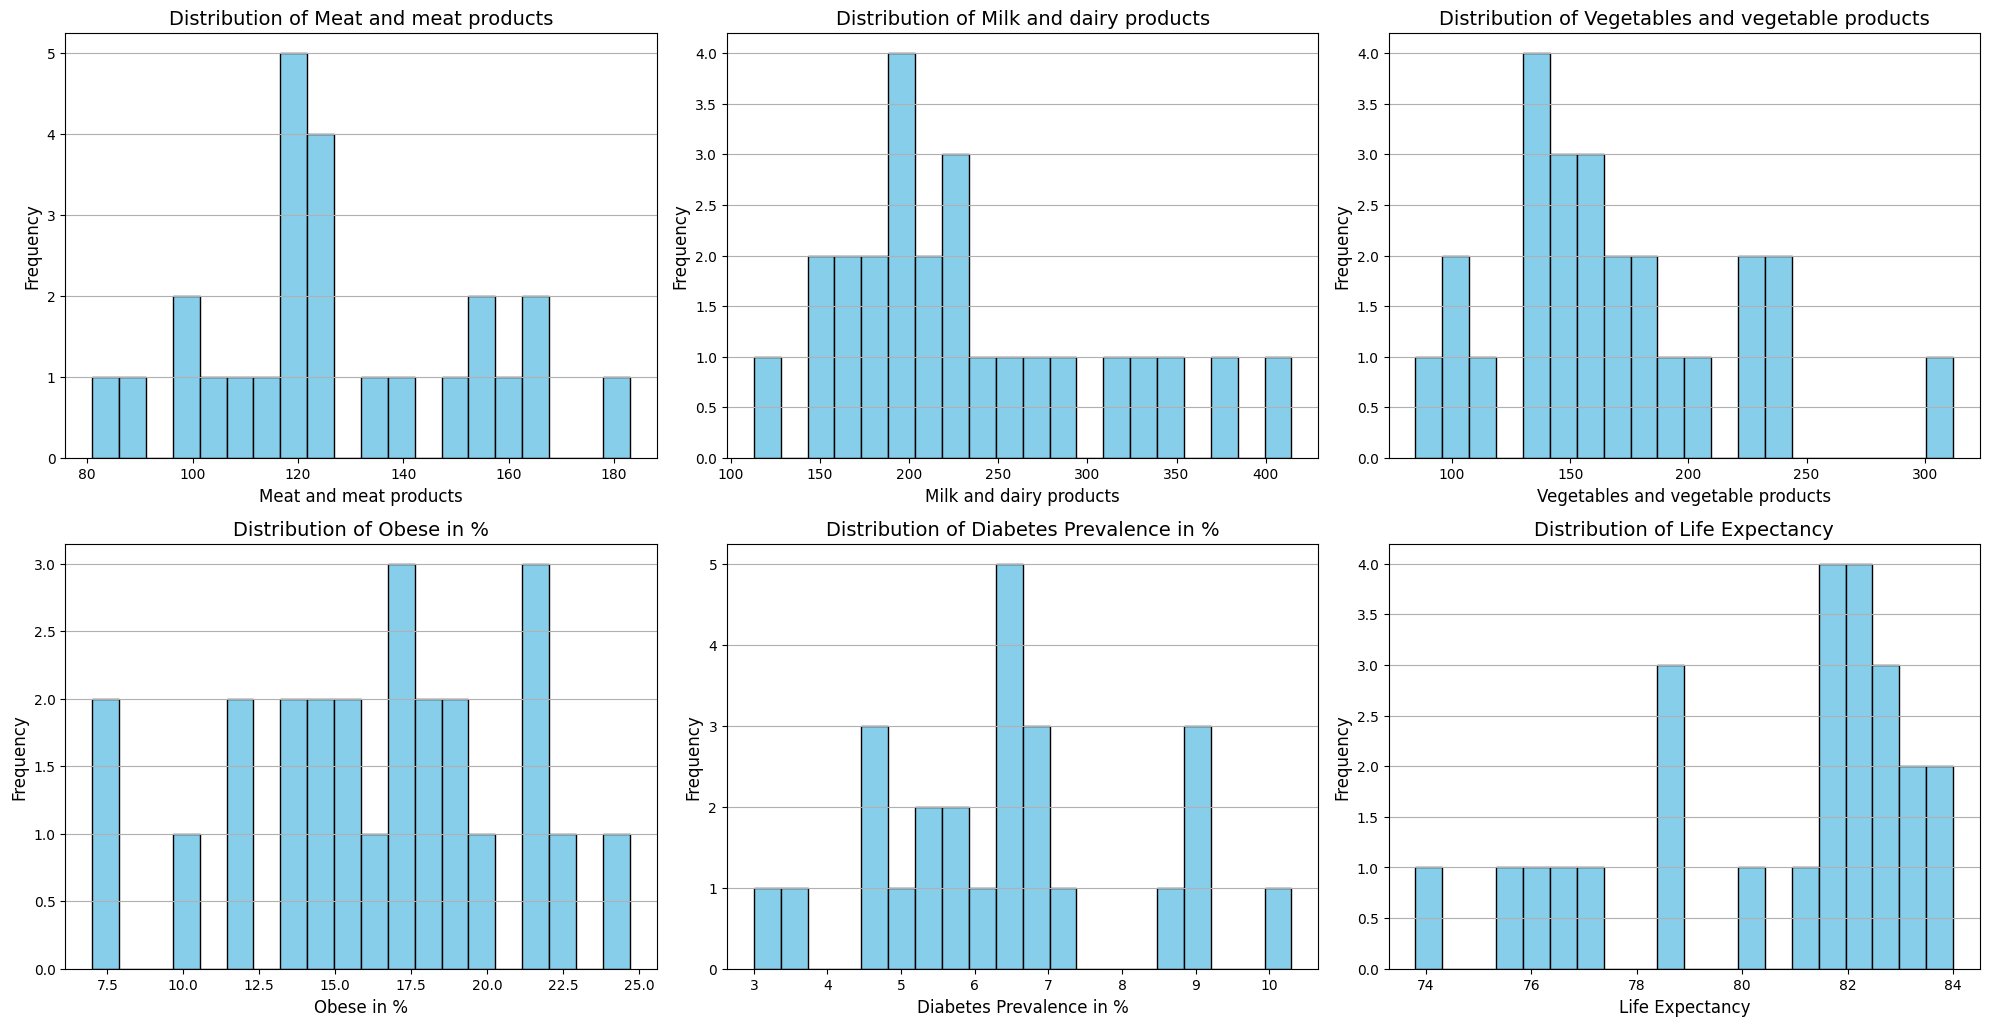

In [620]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_subset[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

As we can see from the descriptive statistics and histograms, these variables seem mostly normally distributed and their statistical proeprties also don't seem to hold any surprising values. 

#### Outliers

The only thing that could be considered an outlier would be for vegetables the one high value. But besides this there haven't been any outliers, also not in further explroation we decided not to incldue since it wouldn't have contributed anything very meaningful. We therefore decided not to do anyhting about outliers in this data.

#### Correlation Tables

Now we look at the correlation tables for the food categories and the health related variables.

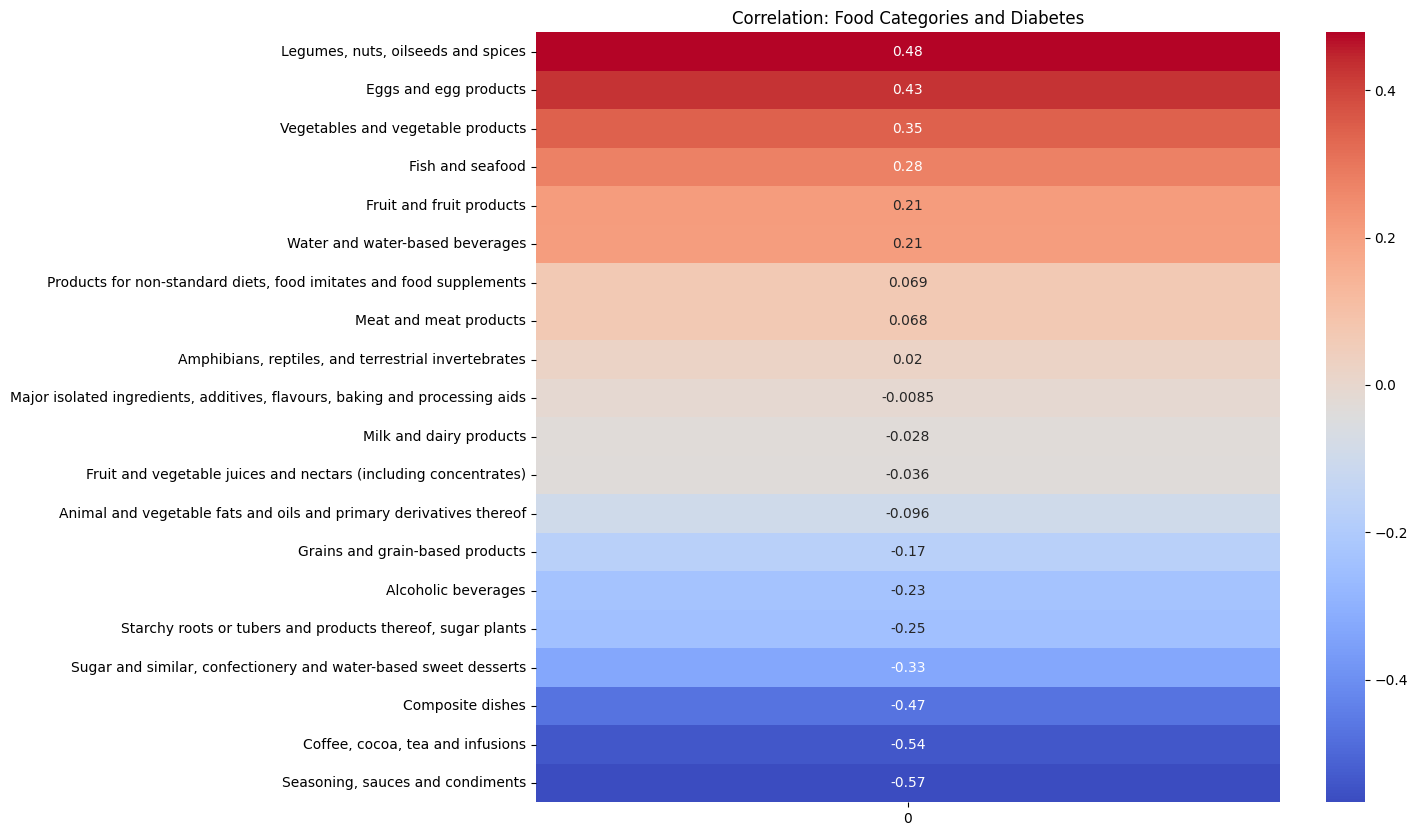

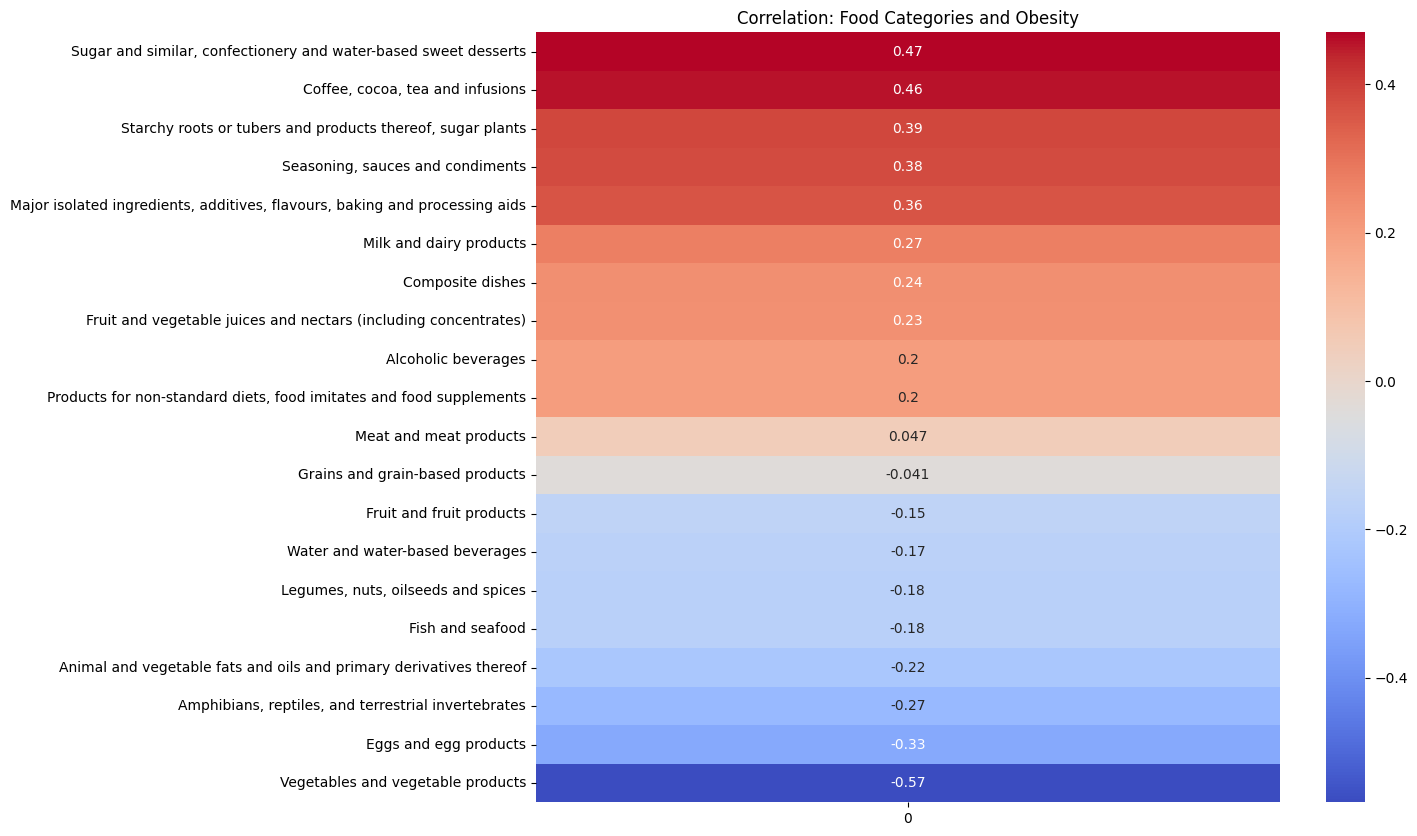

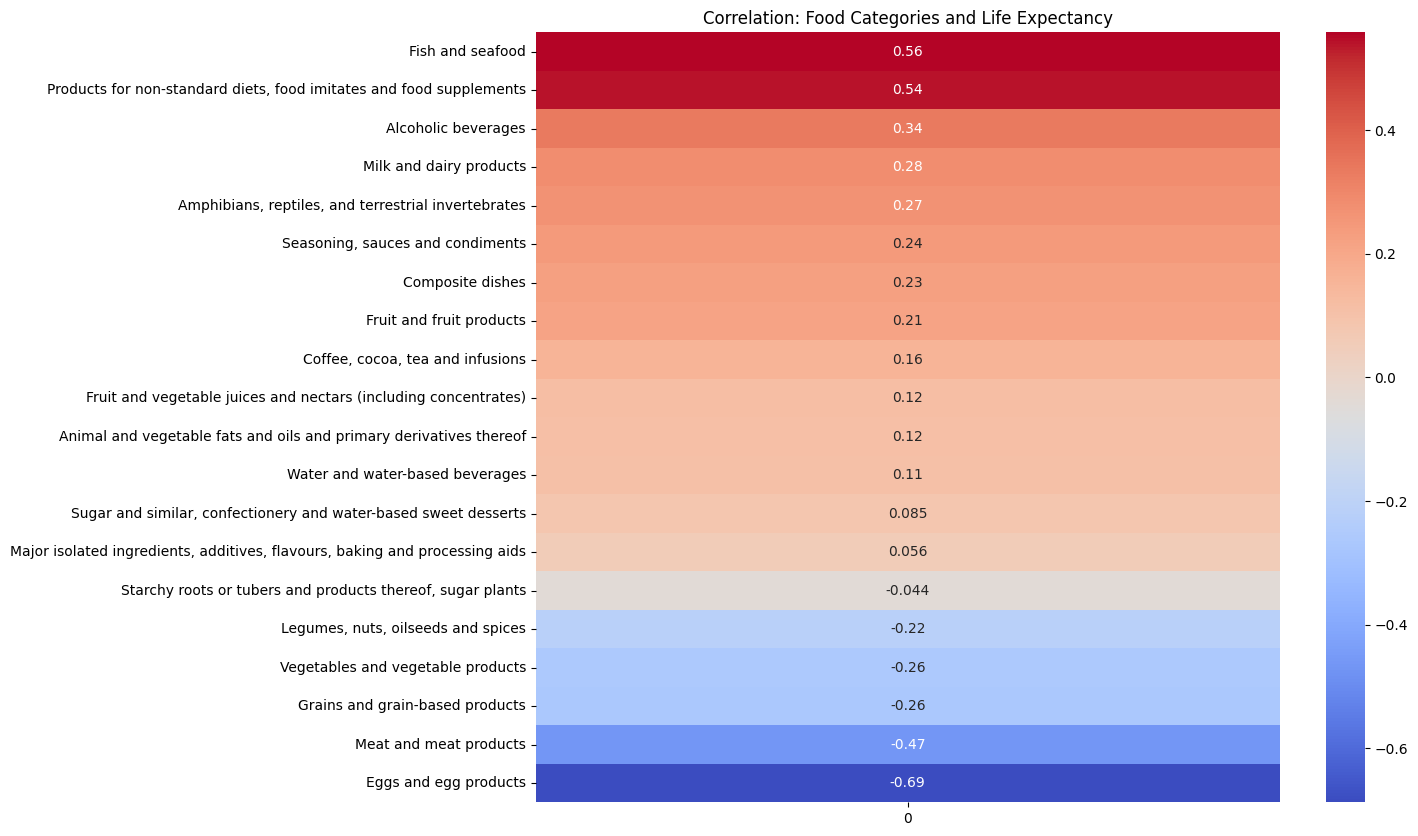

In [621]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between Food Categories and Diabetes
plt.figure(figsize=(12, 10))
sns.heatmap(df_nontime_data.drop(['Country', 'Region','Diabetes Prevalence in %','Obese in %','Life Expectancy'], axis=1).corrwith(df_nontime_data['Diabetes Prevalence in %']).sort_values(ascending=False).to_frame(), 
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation: Food Categories and Diabetes")
plt.show()

#Correlation between Food Categories and Obesity
plt.figure(figsize=(12, 10))
sns.heatmap(df_nontime_data.drop(['Country', 'Region','Obese in %','Diabetes Prevalence in %','Life Expectancy'], axis=1).corrwith(df_nontime_data['Obese in %']).sort_values(ascending=False).to_frame(), 
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation: Food Categories and Obesity")
plt.show()

#Correlation between Food Categories and Life Expectancy
plt.figure(figsize=(12, 10))
sns.heatmap(df_nontime_data.drop(['Country', 'Region','Obese in %','Diabetes Prevalence in %','Life Expectancy'], axis=1).corrwith(df_nontime_data['Life Expectancy']).sort_values(ascending=False).to_frame(), 
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation: Food Categories and Life Expectancy")
plt.show()

We can see some correlations that were to be expected. For obesity there is a strong positive correlation with sugar related food and a strong negative correlation with vegetables. For life expectancy fish and food imitates/food supplements have high positive correlations, so foods that are either known as very healthy or especially made for people who want to eat healthy.

On the other hand there are also some unexpected correlations, like strong positive correlations between coffee/tea and obesity and alcoholic beverages and life expectancy as well as a very strong negative correlation between eggs/egg products and lfie expectancy.

We now also want to take a look at the correlations between the food categories itself, but due to the amount only look at very strong correlations meaning above absolute values of 0.5.

#### Discarding diabetes data

As we can also see in the first plotted correlation table, for the prevelance of diabetes the strongest positive correlations are with nuts, eggs and vegetables, while the lwoest ones are with sauces, coffee and sugar. We first thought at some point reversed the values ort something similar but after thorough inspection we came to the conclusion that there either is a problem with the diabetes data or some more complex underlying structures we couldn't grasp. This also goes against several studies we skimmed through and the general common knowledge that of obviously sugar consumption is the main contributor to diabetes and vegetables in no way. In further steps results of anything we did with the diabetes data never made any sense so we decided at this point to discard the diabetes data and not further incldue it in our analysis. the proposed research question in connection with it were therefore also dropped.

In [622]:
correlation_matrix = df_nontime_data.drop(['Country', 'Region', 'Diabetes Prevalence in %', 'Obese in %', 'Life Expectancy'], axis=1).corr()

correlations_above_threshold = correlation_matrix.unstack().reset_index()
correlations_above_threshold.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlations_above_threshold['Absolute Correlation'] = correlations_above_threshold['Correlation'].abs()

filtered_correlations = correlations_above_threshold[
    (correlations_above_threshold['Absolute Correlation'] > 0.5) &
    (correlations_above_threshold['Feature 1'] != correlations_above_threshold['Feature 2'])
]

filtered_correlations = filtered_correlations.drop_duplicates(subset=['Absolute Correlation'])

filtered_correlations = filtered_correlations.sort_values(by='Absolute Correlation', ascending=False)

filtered_correlations

,Feature 1,Feature 2,Correlation,Absolute Correlation
95,Composite dishes,"Seasoning, sauces and condiments",0.824295,0.824295
68,"Coffee, cocoa, tea and infusions",Fruit and vegetable juices and nectars (includ...,0.690297,0.690297
318,"Seasoning, sauces and condiments",Vegetables and vegetable products,-0.581888,0.581888
134,Fish and seafood,"Products for non-standard diets, food imitates...",0.558369,0.558369
75,"Coffee, cocoa, tea and infusions","Seasoning, sauces and condiments",0.549660,0.549660
277,Milk and dairy products,"Sugar and similar, confectionery and water-bas...",0.537425,0.537425
77,"Coffee, cocoa, tea and infusions","Sugar and similar, confectionery and water-bas...",0.520572,0.520572
98,Composite dishes,Vegetables and vegetable products,-0.515421,0.515421
129,Fish and seafood,Grains and grain-based products,-0.500294,0.500294


We can observe that there are strong positive correlations between food types that usually go well with each other and negative ones for food types that could be considered on different ends of eating habits.

## 3.2 Data Exploration of Time-series Data

#### Descriptive Statistics
We start with the non-time data and few descriptive statistics. We have too much data so we choose one category and show the export/import statistics.

In [646]:
columns_of_interest = [
    ('Cereals','Export quantity'),
    ('Cereals','Export value'),
    ('Cereals', 'Import quantity'),
    ( 'Cereals','Import value')
]

df_subset = df_gdp_life_trade[columns_of_interest]

df_subset.describe()

Cereals                                            
      Export quantity  Export value Import quantity  Import value
count    8.040000e+02  8.040000e+02    8.040000e+02  8.040000e+02
mean     2.486456e+06  6.329915e+05    2.166493e+06  5.956915e+05
std      5.408194e+06  1.373100e+06    3.686431e+06  9.996668e+05
min      0.000000e+00  0.000000e+00    1.559043e+04  6.490000e+03
25%      7.329549e+04  1.788861e+04    1.490076e+05  4.597318e+04
50%      8.586175e+05  2.104621e+05    4.499495e+05  1.517105e+05
75%      1.925603e+06  6.053247e+05    1.984803e+06  5.881836e+05
max      3.510249e+07  1.179763e+07    2.319587e+07  6.894293e+06

We take a closer look to the means of improt quantity and vlaue for all food types.

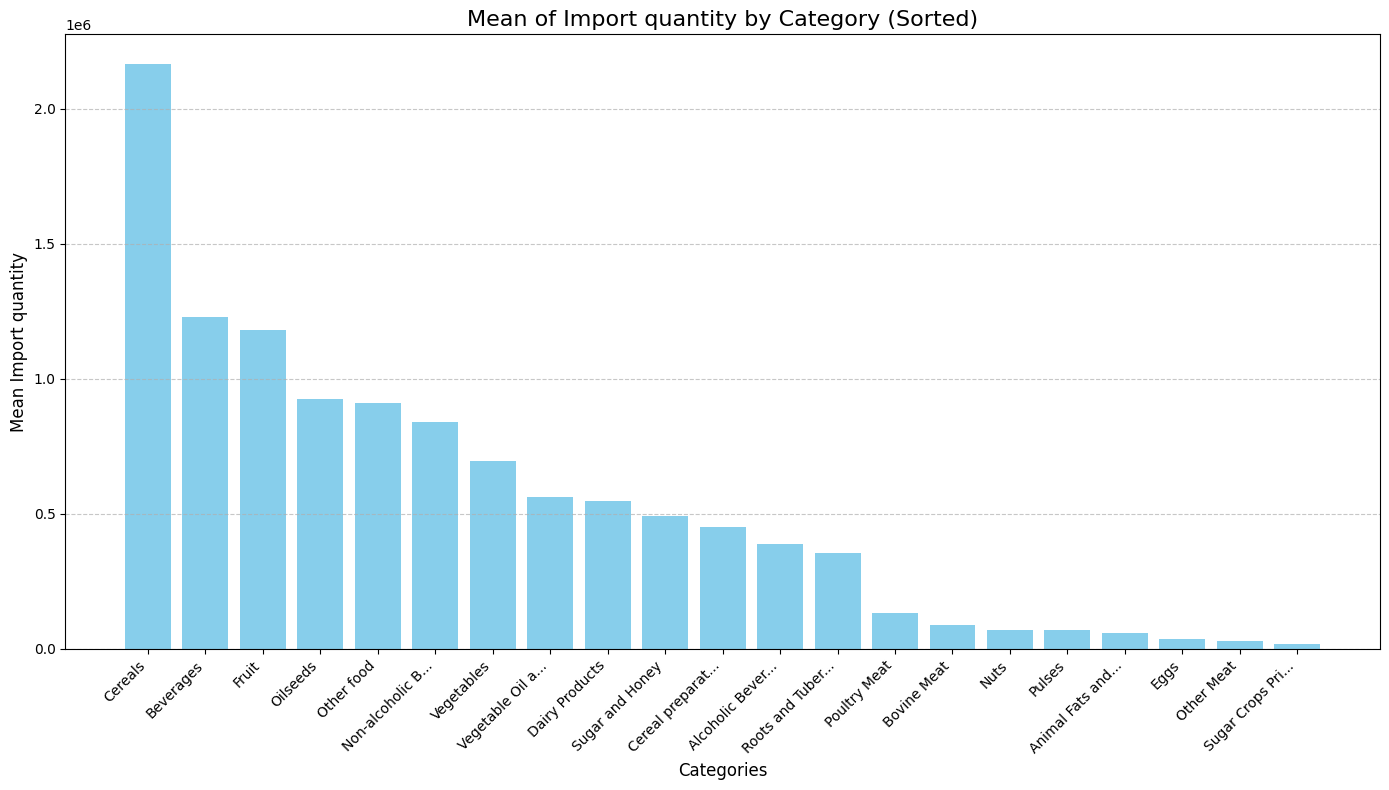

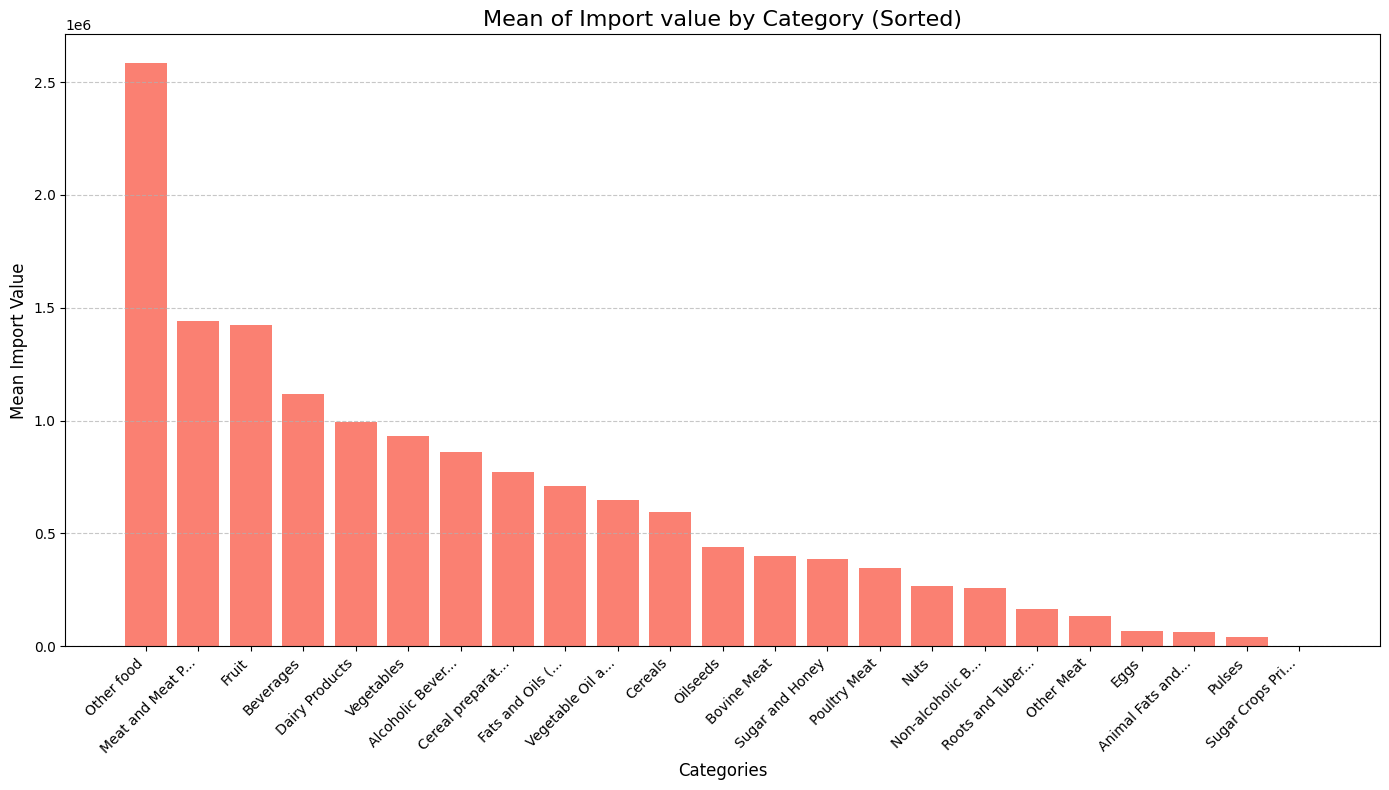

In [649]:
export_columns = [col for col in df_gdp_life_trade.columns if 'Import quantity' in col[1]]
import_columns = [col for col in df_gdp_life_trade.columns if 'Import value' in col[1]]

export_means = df_gdp_life_trade[export_columns].mean().sort_values(ascending=False)
import_means = df_gdp_life_trade[import_columns].mean().sort_values(ascending=False)

def truncate_label(label, max_length=15):
    return label[:max_length] + "..." if len(label) > max_length else label

export_labels = [truncate_label(col[0]) for col in export_means.index]
import_labels = [truncate_label(col[0]) for col in import_means.index]

plt.figure(figsize=(14, 8))
plt.bar(export_labels, export_means, color='skyblue',)
plt.title('Mean of Import quantity by Category (Sorted)', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Mean Import quantity', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align right
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
plt.bar(import_labels, import_means, color='salmon')
plt.title('Mean of Import value by Category (Sorted)', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Mean Import Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align right
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As we can see, in terms of import quantity, cereals with 200,000 tons as well as beverages and food were the most improted foods on average, while for the import value actually (besides the "other food" category) meat and meat preparations with around 150,000,000 dollars as well as fruit and beverages were the top categories while cereal is way lower in the ranking. This is interesting since in the tables and data preprocessing it was clear that many coutnries have as top import and export cereal, meaning grain mainly, while this does in no way seem to be the most profitable product in terms of value.

Now we also look at the distributions again.

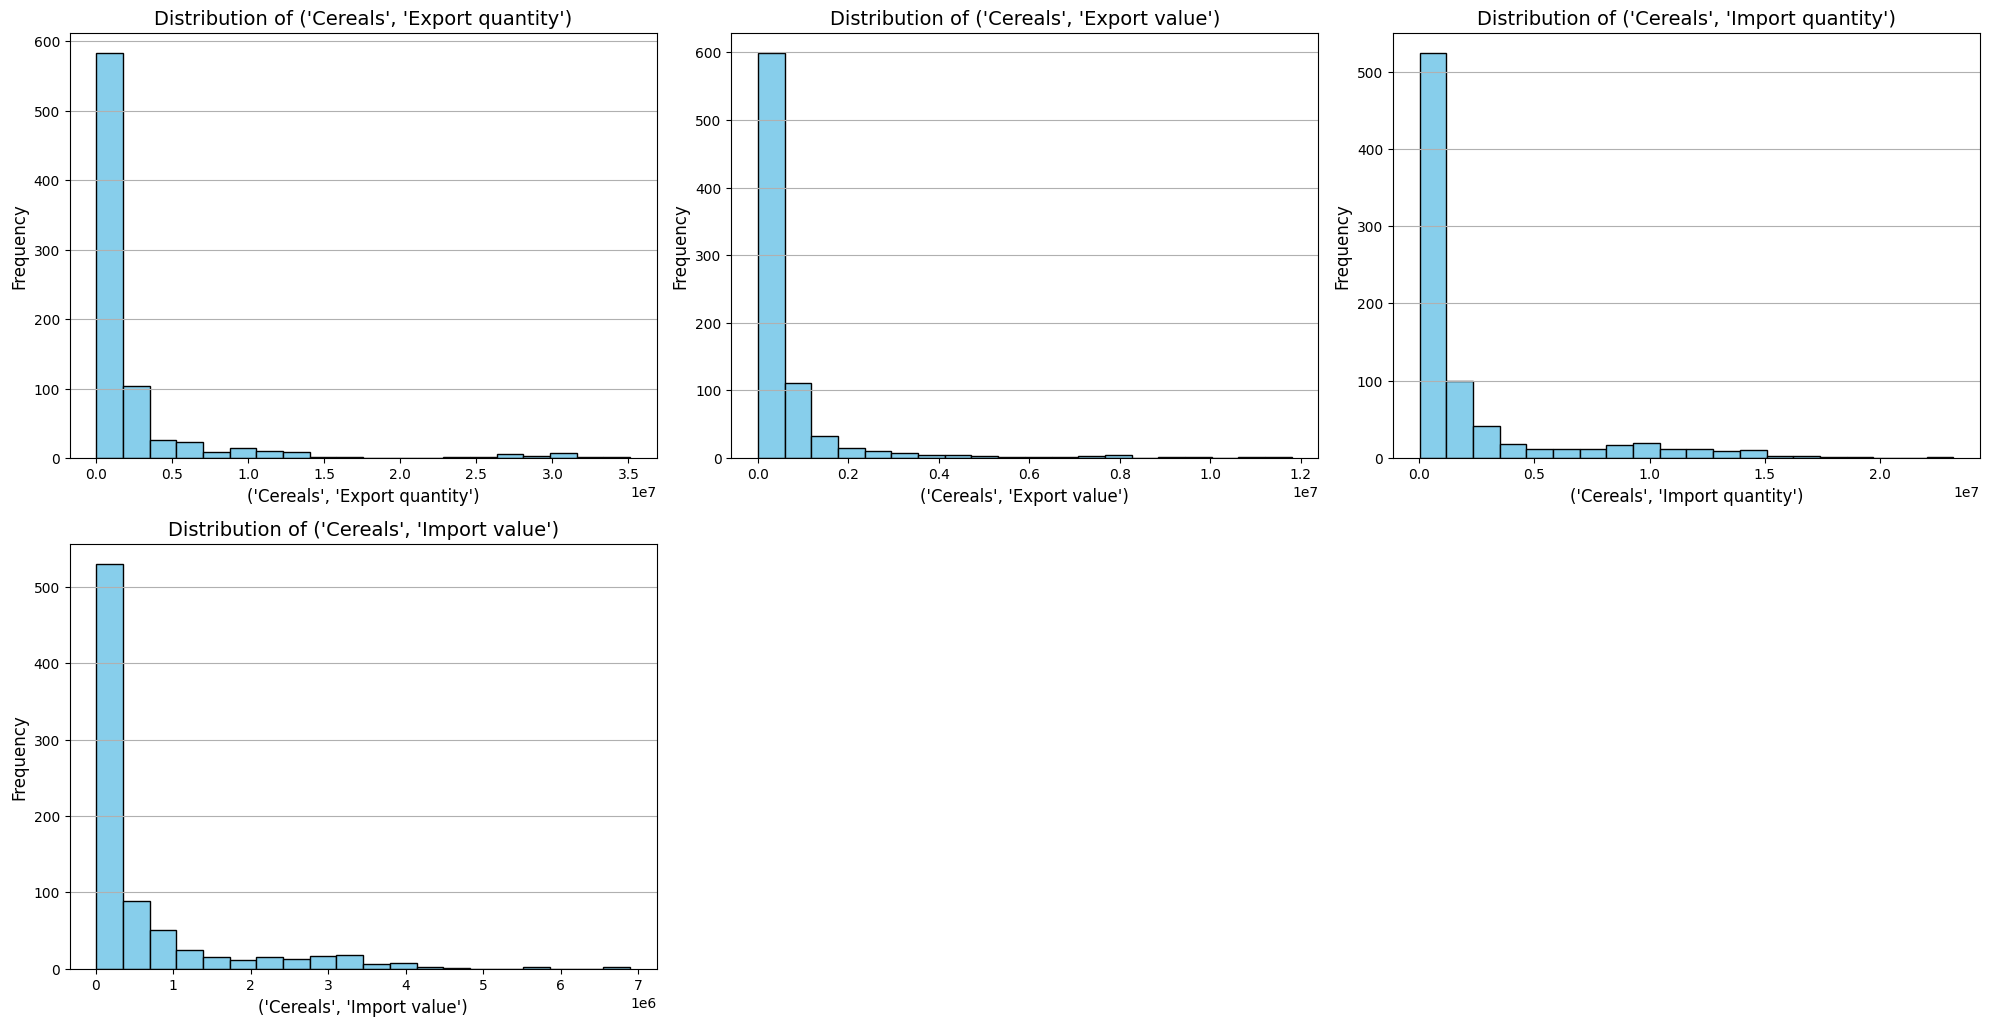

In [645]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_subset[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

As we can see, this time they are very right skewed, which is a trend for most food categories.

#### Outliers
As we can see there are some outliers but they are meaningful in such that they all belong to the bigger and richer coutnries that jsut have a way larger trade and are not faulty data. Therefore we decided not to do anyhting about them.

#### Correlation Tables
Since we have so many columns here with export/import quantity/value for eahc vategory we decided to not incldue correlations tbales since there was no way of selecting a meaningful subset of this and nopt included tries have also shown there are no real strong correlations anywhere.

## 3.3 What are differences and similarities in food consumption/diets across European countries and regions?

We now want to look at possible differences and simialrities in diets across countries and regions. To do so we plot heatmap with the normalized vlaues of consumption of the different food categories.

We start doing this by country.

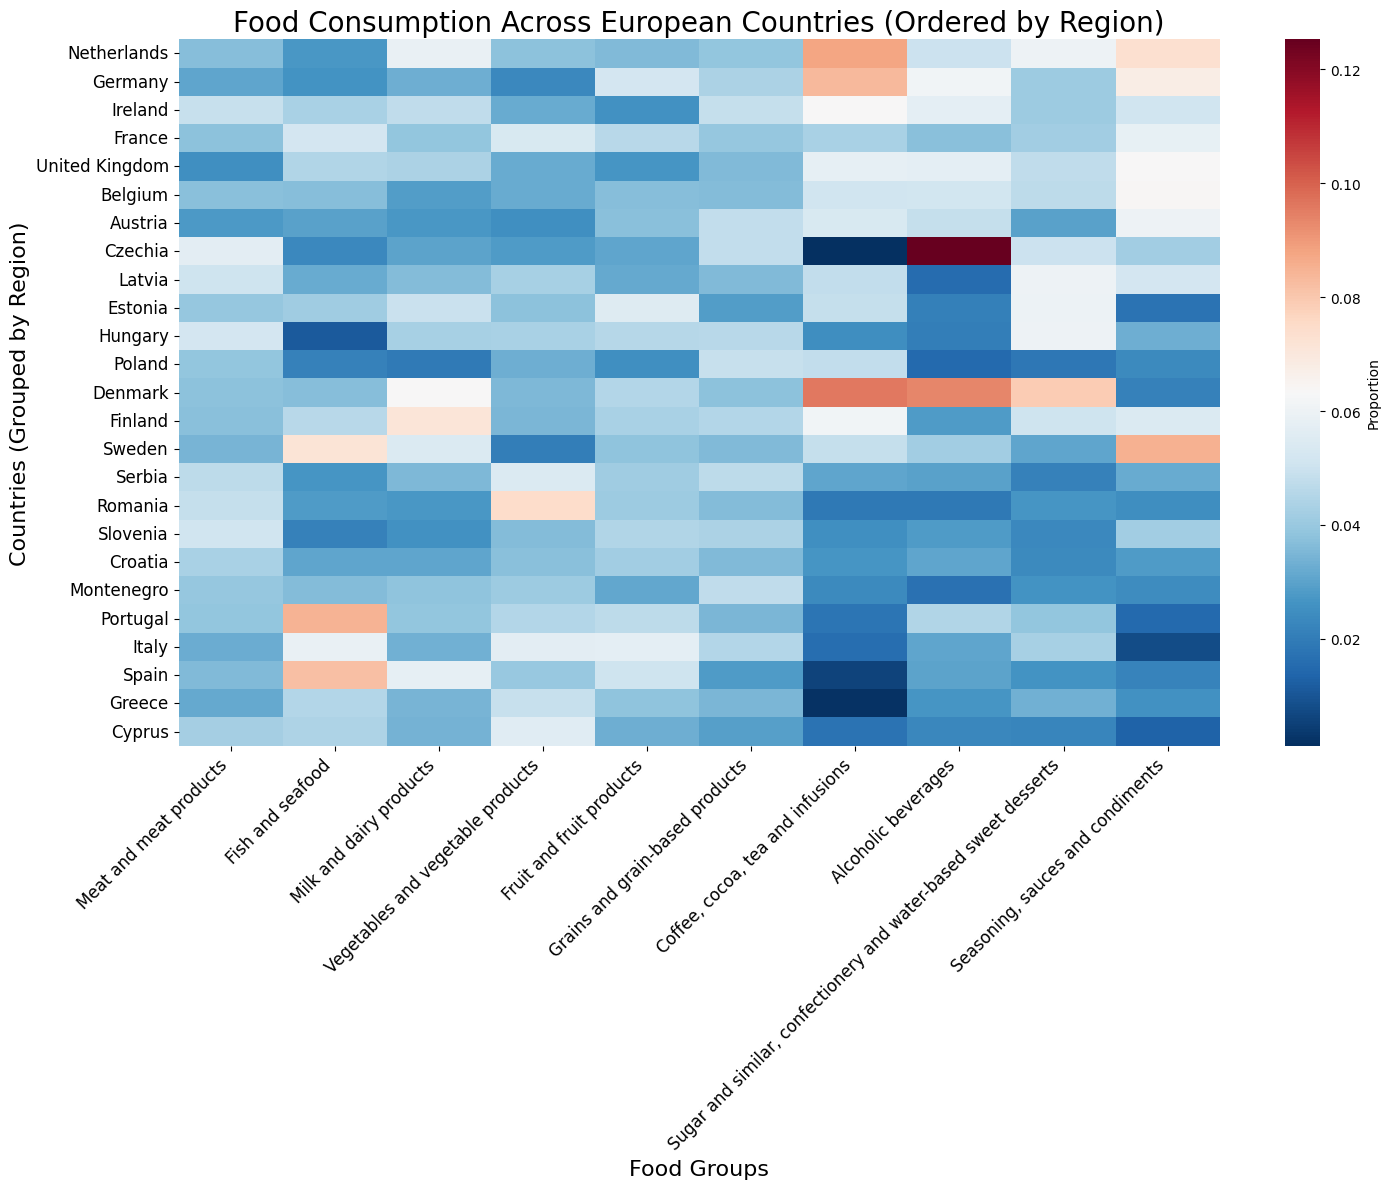

In [651]:
df = df_nontime_data.copy()


food_columns = [
    'Meat and meat products',
    'Fish and seafood',
    'Milk and dairy products',
    'Vegetables and vegetable products',
    'Fruit and fruit products',
    'Grains and grain-based products',
    'Coffee, cocoa, tea and infusions',
    'Alcoholic beverages',
    'Sugar and similar, confectionery and water-based sweet desserts',
    'Seasoning, sauces and condiments'
]
df[food_columns] = df[food_columns].apply(lambda x: x / x.sum(), axis=0) 

country_summary = df.groupby('Country')[food_columns].mean()  
region_summary = df.groupby('Region')[food_columns].mean()

country_summary['Total'] = country_summary.sum(axis=1)
region_summary['Total'] = region_summary.sum(axis=1)

region_mapping1 = df.set_index('Country')['Region'].to_dict()  
country_summary['Region'] = country_summary.index.map(region_mapping1) 

country_summary = country_summary.sort_values(['Region', 'Total'], ascending=[True, False])

plt.figure(figsize=(15, 12))  
sns.heatmap(
    country_summary[food_columns], 
    cmap="RdBu_r", 
    annot=False, 
    cbar=True, 
    cbar_kws={'label': 'Proportion'}
)
plt.title("Food Consumption Across European Countries (Ordered by Region)", fontsize=20)
plt.xlabel("Food Groups", fontsize=16)
plt.ylabel("Countries (Grouped by Region)", fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

On this plot the countries are grouped by region and the food categories are ordered from healthy to unhealthy. We can directly see that the northern countries are high alcohol consumers, just like the countries of western europe. This fits perfectly into our stereotypes, however There are some unexpected results such as Hungary being a low consumer. This brings up some questions about the data quality. We can also quickly notice that italy is a low coffe consumer which is almost nonsensical. The western countries appear to have more unhealthy habits in general, meanwhile the countries with see access tend to follow a healthier diet.

now we do the same again but by region.

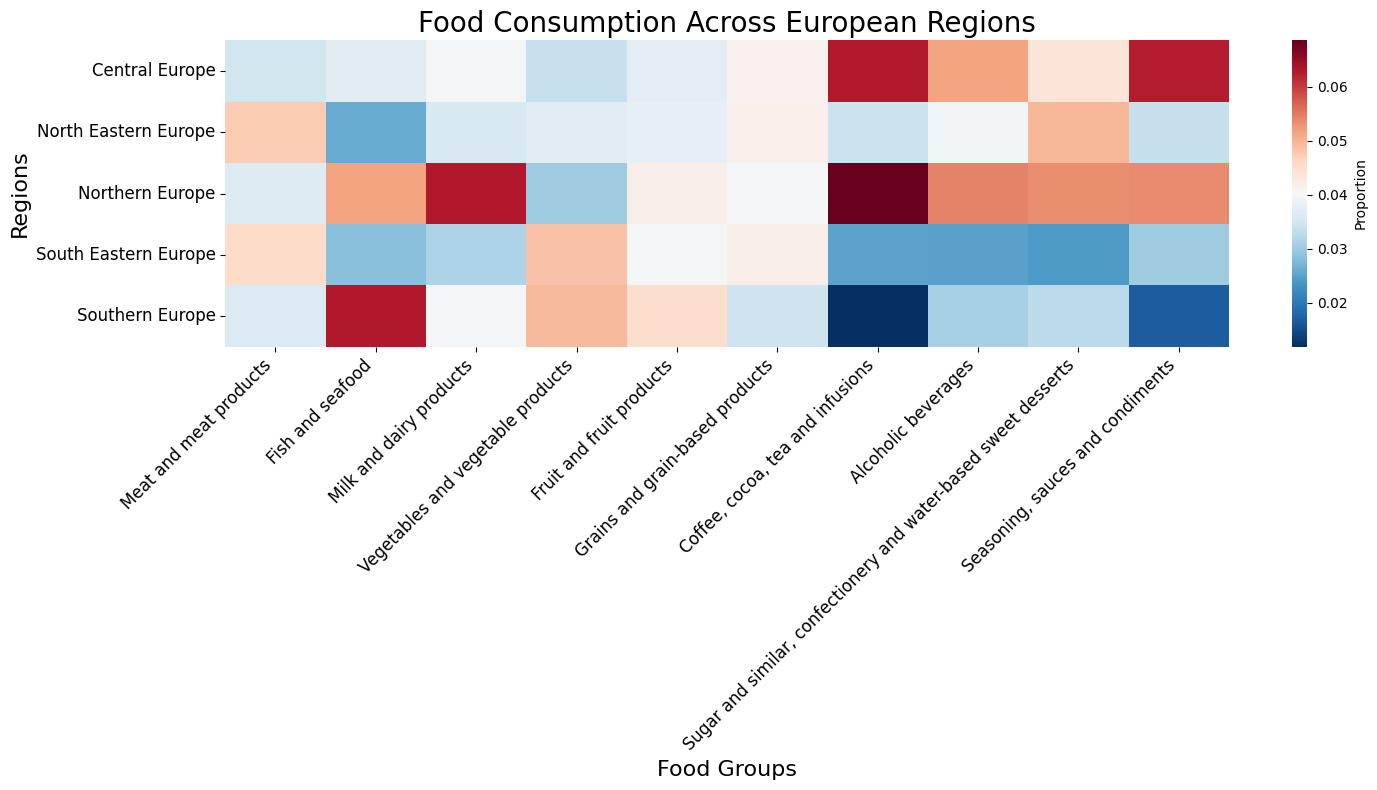

In [652]:
plt.figure(figsize=(15, 8))  
sns.heatmap(region_summary[food_columns], cmap="RdBu_r", annot=False, cbar=True,cbar_kws={'label': 'Proportion'})
plt.title("Food Consumption Across European Regions", fontsize=20)
plt.xlabel("Food Groups", fontsize=16)
plt.ylabel("Regions", fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Based on the second plot we can identify some more trends in eating habits across european regions. The southern/eastern part of europe tends to consume less unhealthy beverages meanwhile they consume the most amount og healthy food. As already noted this probably boils down to the fact that they have sea access and a mediterranean climate and diet  which promotes lighter foods in general. Central and northern europe on the other hand seems to consume more from the unhealthy goods and moderately from the healthier foods. In case of central europe it fits into our picture as most of the healthy food is being imported and is only available at a higher price (seafood for example), meanwhile these countries have a weaker economy compared to the southern and western ones. Northern europeans seem to consume high amounts of everything except fruits, vegetables and grains. Overall we can clearly see some trends that are either related to the general economic state of the countries in the specific regions or to the geographic locations.

# 3.4 What types of foods are mainly exported/imported in a specific country?


For the next steps we are analyzing the highest amounts of exported and imported food products across various European countries.The blue color for exports and orange color for imports . We have sorted the bar charts based on the export values.We can see  cereals as a key commodity. The plot reveals that France leads in cereal exports by a significant margin compared to other countries. This can be attributed to France’s status as one of Europe’s largest agricultural producers, benefiting from extensive arable land, advanced farming technology, and supportive agricultural policies. Interestingly, cereals emerge as the most exported product for the majority of European countries, largely due to Europe’s favorable climate and soil conditions for cereal cultivation, as well as high global demand and the EU’s Common Agricultural Policy, which encourages large-scale cereal production. On the import side, Spain stands out as the largest cereal importer. Despite being an agricultural powerhouse, Spain’s hot and dry climate, coupled with periodic droughts, limits its cereal production, making imports essential to satisfy domestic demand for food and livestock feed. Another notable finding is Portugal, which imports nearly three times as many cereals as it exports. This disparity can be explained by Portugal’s limited arable land, challenging terrain, and less favorable climatic conditions, which hinder its ability to produce cereals at scale, necessitating significant imports to meet consumption needs. Overall, the analysis highlights the pivotal role of cereals in European trade and the diverse factors influencing export and import patterns across countries.

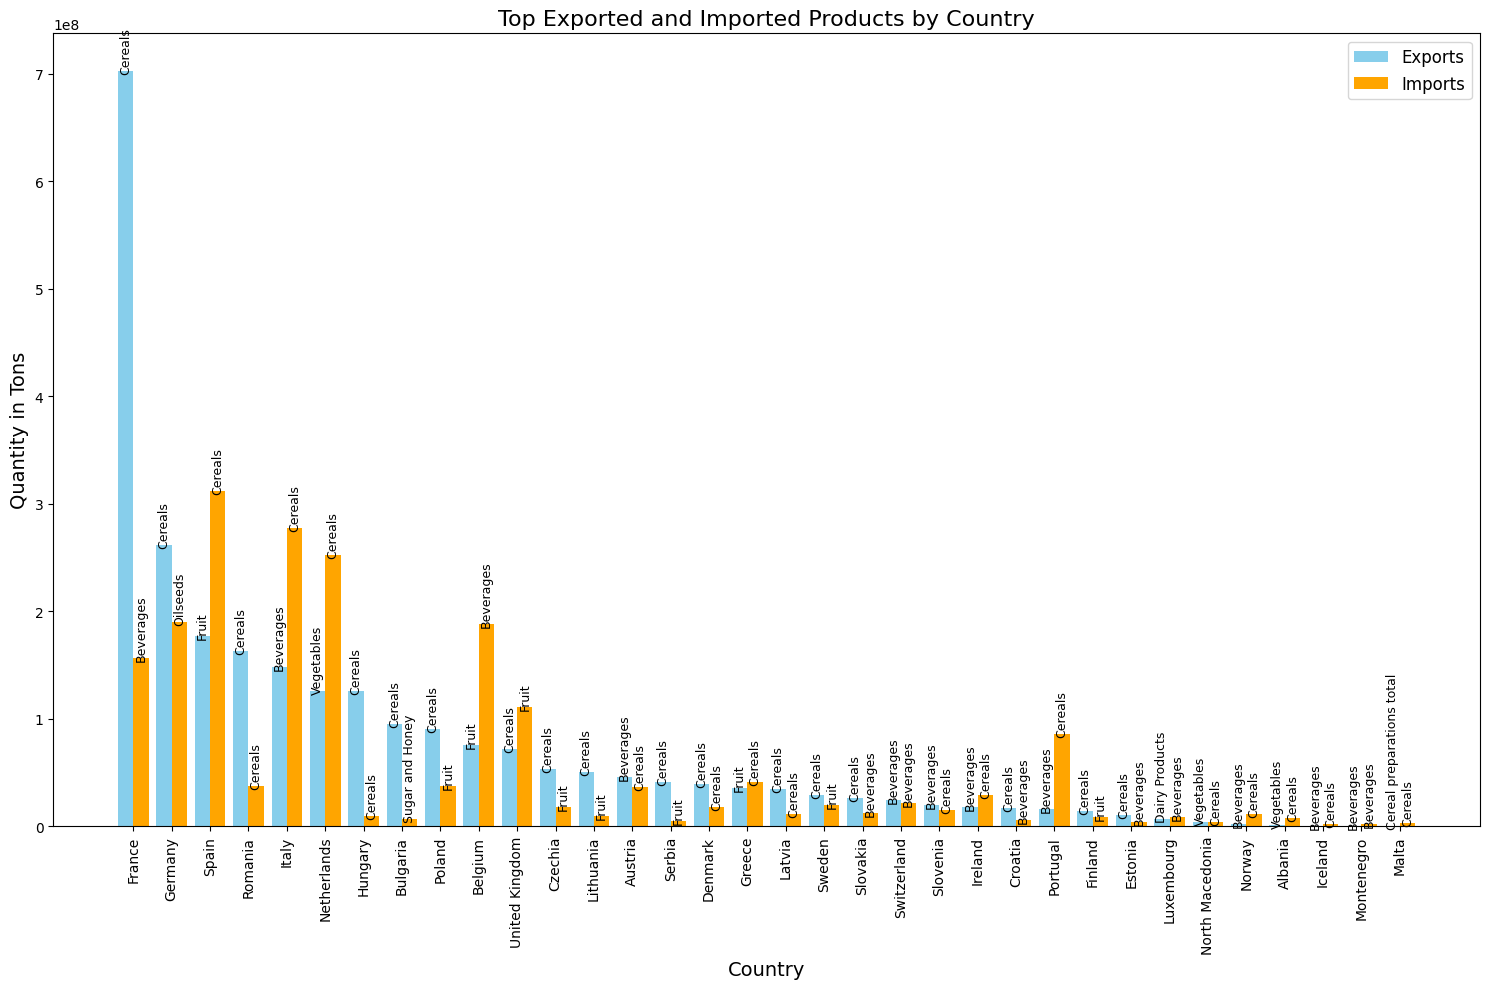

In [264]:
export_columns = [col for col in df_gdp_life_trade.columns if col[1] == 'Export quantity' and col[0] != 'Other food']
import_columns = [col for col in df_gdp_life_trade.columns if col[1] == 'Import quantity' and col[0] != 'Other food']


trade_summary = df_gdp_life_trade.groupby(('', 'Country'))[export_columns + import_columns].sum()

trade_summary['Top Exported Food'] = trade_summary[export_columns].idxmax(axis=1)
trade_summary['Top Export Value'] = trade_summary[export_columns].max(axis=1)

trade_summary['Top Imported Food'] = trade_summary[import_columns].idxmax(axis=1)
trade_summary['Top Import Value'] = trade_summary[import_columns].max(axis=1)

plot_data = trade_summary[['Top Exported Food', 'Top Export Value', 'Top Imported Food', 'Top Import Value']].reset_index()

plot_data = plot_data.sort_values('Top Export Value', ascending=False)


def clean_category_name(category):
    return category[0]  

x = np.arange(len(plot_data))  
width = 0.4 

fig, ax = plt.subplots(figsize=(15, 10))

bars1 = ax.bar(x - width / 2, plot_data['Top Export Value'], width, label='Exports', color='skyblue')

bars2 = ax.bar(x + width / 2, plot_data['Top Import Value'], width, label='Imports', color='orange')

ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Quantity in Tons", fontsize=14)
ax.set_title("Top Exported and Imported Products by Country", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(plot_data[('', 'Country')], rotation=90, fontsize=10)
ax.legend(fontsize=12)

for bar, product in zip(bars1, plot_data['Top Exported Food']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        clean_category_name(product), 
        ha="center",
        fontsize=9,
        rotation=90
    )

for bar, product in zip(bars2, plot_data['Top Imported Food']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        clean_category_name(product),
        ha="center",
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


## 3.5 How import and export will change over time for each country?

Now we will plot the evolution of the imports and exports. Since doing this for evrey coutnry we would get a cluttered plto ("Spaghetti plot") we decided to analyze this by Region isneatd of Coutnry.

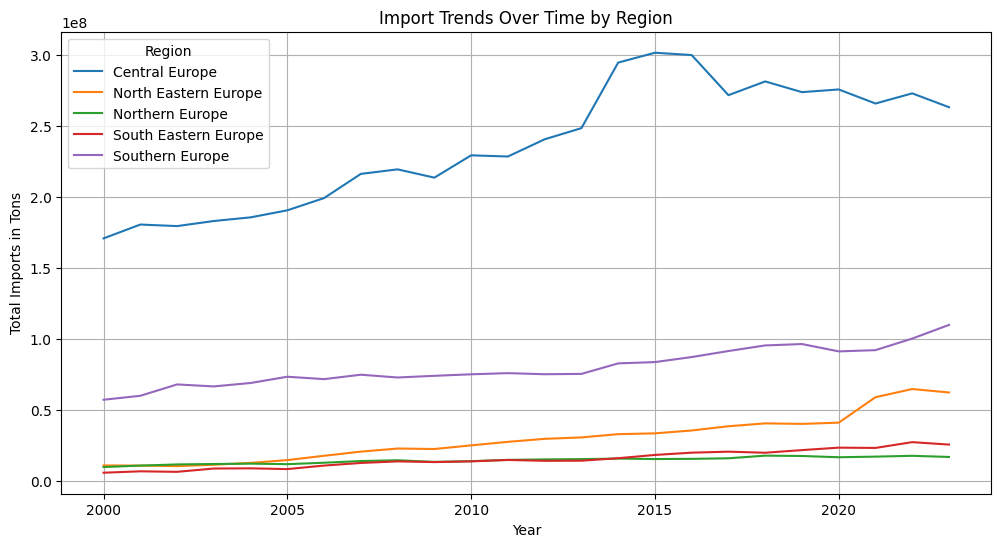

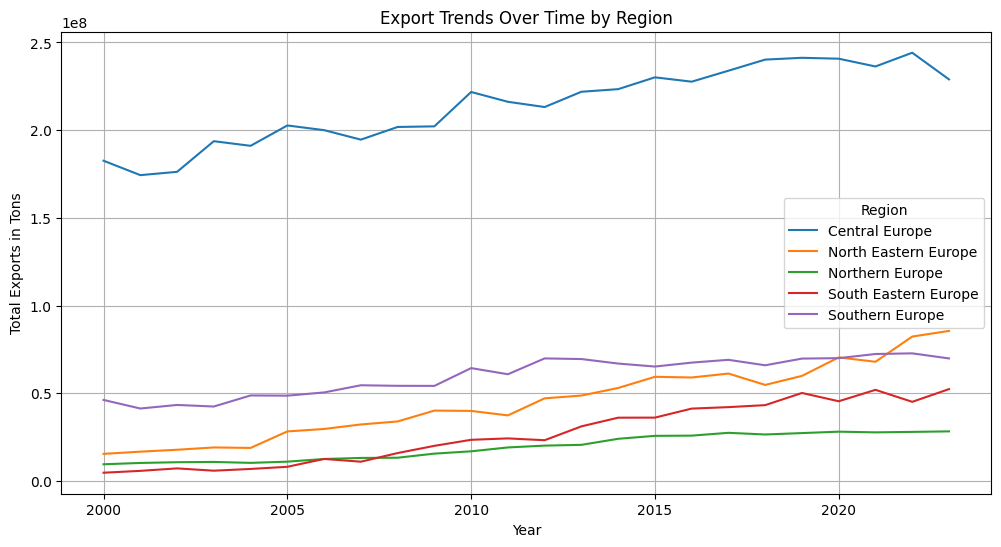

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_processed = df_gdp_life_trade.copy()

df_processed[('', 'Region')] = df_processed[('', 'Country')].map(region_mapping)



import_columns = [col for col in df_processed.columns if 'Import quantity' in col[1]]
export_columns = [col for col in df_processed.columns if 'Export quantity' in col[1]]

numeric_columns = import_columns + export_columns
numeric_columns.append(('', 'Year')) 
numeric_columns.append(('', 'Region')) 

df_numeric = df_processed[numeric_columns]


summary = df_numeric.groupby([('', 'Year'), ('', 'Region')]).sum(numeric_only=True)

import_summary = summary[import_columns].sum(axis=1).reset_index(name='Total Imports')
export_summary = summary[export_columns].sum(axis=1).reset_index(name='Total Exports')

import_export_summary = import_summary.merge(
    export_summary,
    on=[('', 'Year'), ('', 'Region')],
    how='inner'
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=import_export_summary,
    x=('', 'Year'),
    y='Total Imports',
    hue=('', 'Region')
)
plt.title('Import Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Total Imports in Tons')
plt.legend(title='Region')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=import_export_summary,
    x=('', 'Year'),
    y='Total Exports',
    hue=('', 'Region')
)
plt.title('Export Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Total Exports in Tons')
plt.legend(title='Region')
plt.grid(True)
plt.show()


The import trends show steady growth across all EU regions from 2000 to 2020. Central Europe has the highest total imports in tons throughout the period, followed by Southern Europe and Northern Europe, with South Eastern Europe and North Eastern Europe having lower import volumes. Imports increased most rapidly between 2000-2010.
Export trends also demonstrate an overall upward trajectory from 2000-2020 for all regions, with some fluctuations. Central Europe maintains the highest export volumes, with Southern Europe close behind by 2020. Northern Europe sees stable export growth, while South Eastern and North Eastern Europe have lower total exports. The period of 2005-2015 showed the sharpest rise in exports across regions.
In summary, both imports and exports have trended up significantly in the EU from 2000-2020, with imports growing faster in the first decade and exports accelerating more in the 2005-2015 timeframe. The western and central regions account for the bulk of import and export activity.

## 3.6 Is there a relationship between the GDP per capita and food consumption?

We now want to visualize the relationship between food consumption in general and the GDP per capita.

Correlation between GDP per Capita and Total Food Consumption: 0.57


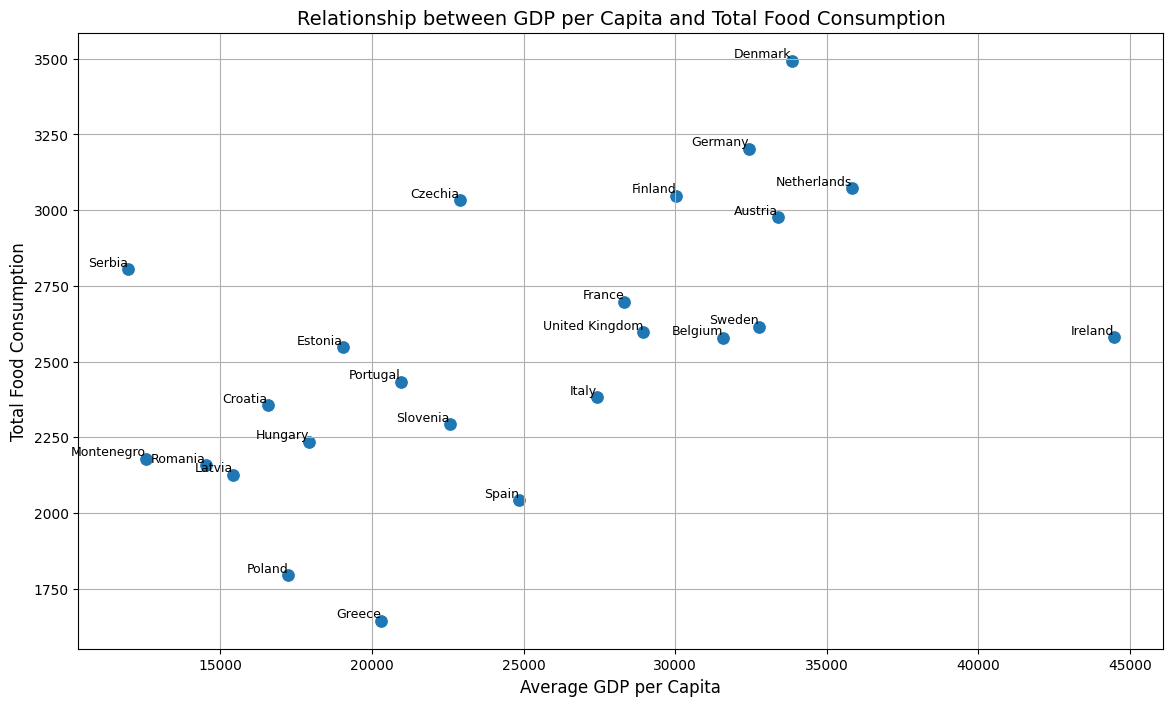

In [267]:
import seaborn as sns


df_food_consumption = df_nontime_data.copy()
df_food_consumption['Total Food Consumption'] = df_food_consumption.iloc[:, 5:].sum(axis=1)

df_trade_copy = df_gdp_life_trade.copy()
df_trade_copy.columns = ['-'.join(col).strip() if isinstance(col, tuple) else col for col in df_trade_copy.columns]

df_trade_copy['-GDP_PC'] = pd.to_numeric(df_trade_copy['-GDP_PC'], errors='coerce')

df_trade_clean = df_trade_copy.dropna(subset=['-GDP_PC'])

df_gdp = df_trade_clean.groupby('-Country', as_index=False)['-GDP_PC'].mean()
df_gdp.rename(columns={'-GDP_PC': 'Average GDP Per Capita'}, inplace=True)

df_combined_gdp_food = pd.merge(
    df_gdp,
    df_food_consumption.rename(columns={'Country': '-Country'})[['-Country', 'Total Food Consumption']],
    on='-Country',
    how='inner'
)

correlation = df_combined_gdp_food[['Average GDP Per Capita', 'Total Food Consumption']].corr().iloc[0, 1]
print(f"Correlation between GDP per Capita and Total Food Consumption: {correlation:.2f}")

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_combined_gdp_food,
    x='Average GDP Per Capita',
    y='Total Food Consumption',
    s=100  # Size of scatter points
)

for i in range(df_combined_gdp_food.shape[0]):
    plt.text(
        x=df_combined_gdp_food['Average GDP Per Capita'].iloc[i],
        y=df_combined_gdp_food['Total Food Consumption'].iloc[i],
        s=df_combined_gdp_food['-Country'].iloc[i],
        fontsize=9,  
        ha='right',  
        va='bottom'
    )

plt.title('Relationship between GDP per Capita and Total Food Consumption', fontsize=14)
plt.xlabel('Average GDP per Capita', fontsize=12)
plt.ylabel('Total Food Consumption', fontsize=12)
plt.grid(True)
plt.show()


There appears to be a positive correlation between the two variables. As GDP per capita increases, countries tend to have higher levels of total food consumption.
However, the relationship is not perfectly linear, as the rate of increase in food consumption seems to slow down at higher levels of GDP per capita. For example, while there is a steep rise in food consumption between countries with GDP per capita above 25,000 dollars, there are some outliers (e.g., Poland, Greece). Those in the 25,000 dollars to 35,000 dollars range (e.g., Italy, Spain, Finland) happen to eat more and in this range there is indeed a high correlation between the two. The countries with GDP per capita above 35,000 dollars are on the other hand seem to eat less.
Additionally, there are some outliers that deviate from the general trend, such as Serbia, which has a relatively high food consumption level despite a lower GDP per capita compared to other countries. Overall, while higher GDP per capita is associated with greater food consumption, the relationship is not perfectly predictable, and other factors beyond economic prosperity may also influence a country's level of food consumption.

## 3.7 Is there a relationship between the GDP per capita and the amount and type of food exported/imported

To explore the relationship between GDP per capita and the amount of food exported and imported for each country, we used a scatterplot, distinguishing regions by colors. The analysis reveals a weak correlation between food trade (exports and imports) and GDP per capita, with numerous outliers. These outliers can be attributed to various factors. For instance, countries like France, Germany, and the Netherlands show significantly higher export values for food relative to their GDP per capita. This can be explained by their robust agricultural industries, advanced logistics, and strong export-oriented economies, which allow them to maintain high export levels despite variations in GDP per capita. On the other hand, Luxembourg stands out as a unique outlier in the export plot, showing a substantial disparity between its exceptionally high GDP per capita and its comparatively low total food exports. This is likely due to Luxembourg's small size, limited agricultural capacity, and its economy being driven by financial services rather than agriculture. In terms of imports, Germany, the Netherlands, and Belgium exhibit a similar pattern, with high import values driven by their roles as key trade hubs and their significant reliance on food imports to support large populations and re-export activities. These findings highlight the complex interplay between economic factors and food trade across European countries.

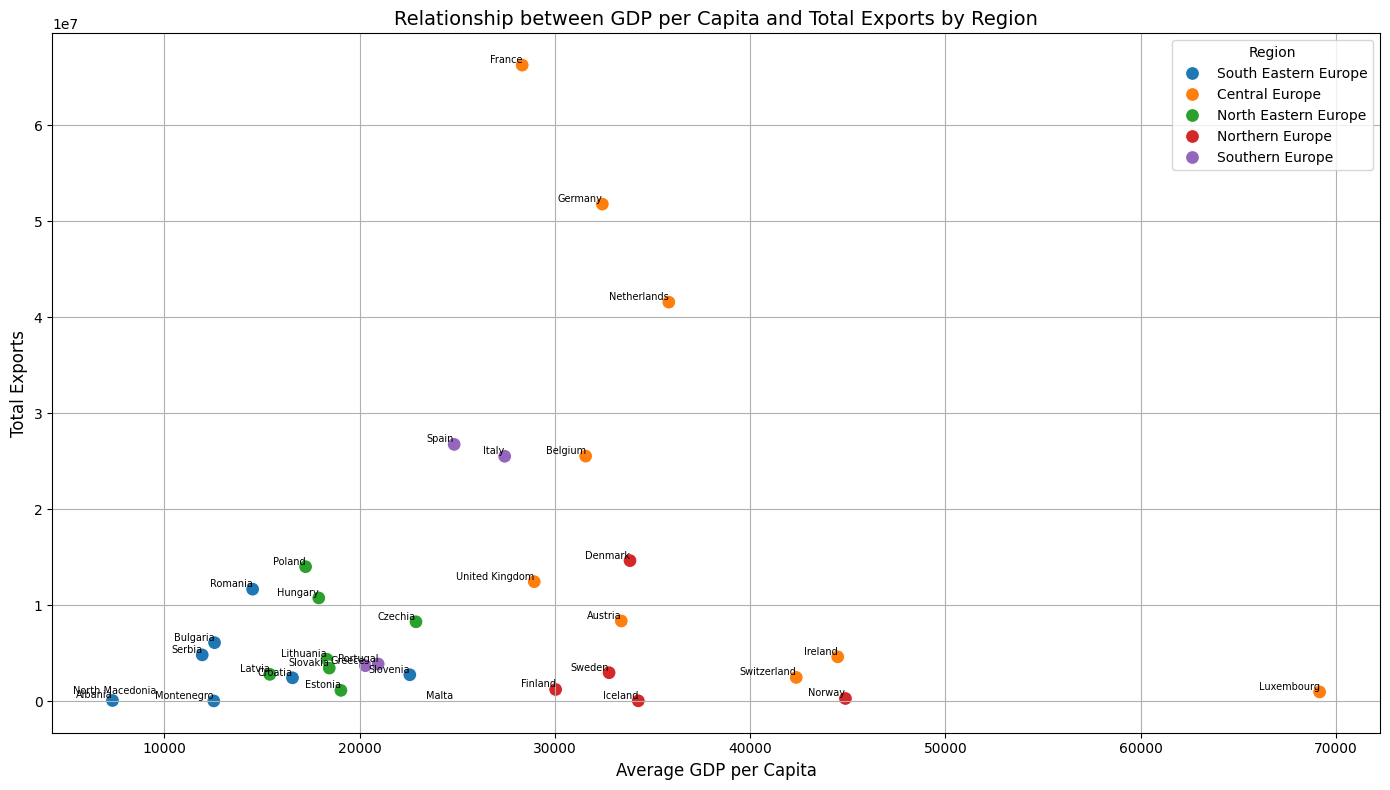

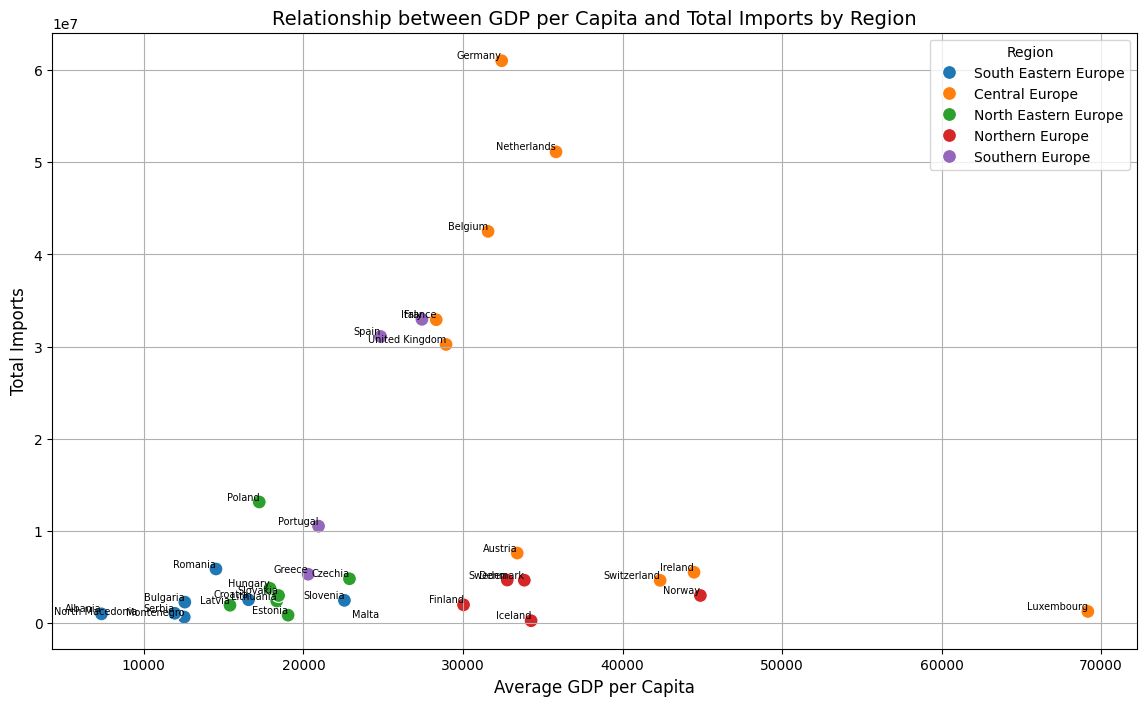

In [655]:
df_trade_copy = df_gdp_life_trade.copy()
df_trade_copy.columns = ['-'.join(col).strip() if isinstance(col, tuple) else col for col in df_trade_copy.columns]

df_trade_copy['-GDP_PC'] = pd.to_numeric(df_trade_copy['-GDP_PC'], errors='coerce')  
df_trade_clean = df_trade_copy.dropna(subset=['-GDP_PC']) 
df_gdp = df_trade_clean.groupby('-Country', as_index=False)['-GDP_PC'].mean()
df_gdp.rename(columns={'-GDP_PC': 'Average GDP Per Capita'}, inplace=True)


export_columns = [col for col in df_trade_copy.columns if 'Export' in col]
import_columns = [col for col in df_trade_copy.columns if 'Import' in col]
for col in export_columns + import_columns:
    df_trade_clean[col] = pd.to_numeric(df_trade_clean[col], errors='coerce')
df_aggregated_trade = df_trade_clean.groupby('-Country', as_index=False)[export_columns + import_columns].mean()

df_aggregated_trade['Total Exports'] = df_aggregated_trade[[col for col in export_columns if 'quantity' in col]].sum(axis=1)
df_aggregated_trade['Total Imports'] = df_aggregated_trade[[col for col in import_columns if 'quantity' in col]].sum(axis=1)

df_combined_gdp_trade = pd.merge(df_gdp, df_aggregated_trade, on='-Country', how='inner')

df_combined_gdp_trade['Region'] = df_combined_gdp_trade['-Country'].map(region_mapping)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_combined_gdp_trade,
    x='Average GDP Per Capita',
    y='Total Exports',
    hue='Region',
    palette='tab10',
    s=100
)
for i in range(df_combined_gdp_trade.shape[0]):
    plt.text(
        x=df_combined_gdp_trade['Average GDP Per Capita'].iloc[i],
        y=df_combined_gdp_trade['Total Exports'].iloc[i],
        s=df_combined_gdp_trade['-Country'].iloc[i],
        fontsize=7,
        ha='right',
        va='bottom'
    )
plt.title('Relationship between GDP per Capita and Total Exports by Region', fontsize=14)
plt.xlabel('Average GDP per Capita', fontsize=12)
plt.ylabel('Total Exports', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.grid(True)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_combined_gdp_trade,
    x='Average GDP Per Capita',
    y='Total Imports',
    hue='Region',
    palette='tab10',
    s=100
)
for i in range(df_combined_gdp_trade.shape[0]):
    plt.text(
        x=df_combined_gdp_trade['Average GDP Per Capita'].iloc[i],
        y=df_combined_gdp_trade['Total Imports'].iloc[i],
        s=df_combined_gdp_trade['-Country'].iloc[i],
        fontsize=7,
        ha='right',
        va='bottom'
    )
plt.title('Relationship between GDP per Capita and Total Imports by Region', fontsize=14)
plt.xlabel('Average GDP per Capita', fontsize=12)
plt.ylabel('Total Imports', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.grid(True)
plt.show()

Finished datsets you can use: df_gdp_life_trade and df_nontime_data

## 4. Training models to answer some questions + Eval

When we first looked through the available datasets, we wanted to pick topics that would be both meaningful to analyze and feasible with machine learning. The obesity and diabetes risk analysis caught our attention since it connects food consumption patterns to public health outcomes - something that affects millions of people worldwide. For our second topic, we chose to build a regression model for GDP per capita prediction, as it seemed to be an interesting challenge to find some correlation between the food consumption/food related health issues and the economic strength of the countries. Though we hadn't done deep analysis yet, both datasets seemed to have good quality data and enough variables to work with. We basically tried to find a sweet spot between picking important real-world problems and making sure we had enough solid data to actually build useful models.

### 4.1 Obesity and Life Expectancy Analysis in relation to Food Consumption


#### 4.1.1 Is there a relationship between the obesity rate and food consumption?

In this section we will try to train to train a regression model that can estimate the Obesity rate for a ocutnry given only the specific food types on average consumed by adults in that country. Key will therefore not be to get a model that perfroms super well in terms of estimating the correct value but that we can get insights/importance rankings of the predictors, e.g. knowing which type of food possibly continues most towards a higher obesity rate.

In [269]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

First we perform the train/test split in a traditional 70/30 split since we have very few samples. We want to run the model for predicitng obesity rates only on the food consumption data sicne for one that is one of our research goals, to discover the relation between these. Secondly it also doesn't make sense to include life expectancy or region/country sicne geographical data would lead to bias and life expectancy is strongly correlated with obesity.

In [270]:
def train_split(df: pd.DataFrame, target: str, random_state: int, train_fraction: float):

    predictors = df.columns.difference([target, "Country", "Region", "Overweight in %", "Obese in %", "Diabetes Prevalence in %"])
    X = df[predictors]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_fraction,
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

In [ ]:
Now we implement the typical functions to train a model and predict via it. As perforamnce metric we chose RMSE si

In [271]:
def train_model(model_type: type, X_train: pd.DataFrame, y_train: pd.DataFrame):

    trained_model = model_type()
    trained_model.fit(X_train, y_train)
    return trained_model

def predict_target(trained_model, X_valid: pd.DataFrame) -> np.ndarray:

    y_pred = trained_model.predict(X_valid)
    return y_pred

def calculate_rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [272]:
X_train, X_test, y_train, y_test = train_split(
    df=df_nontime_data, 
    target="Obese in %",  
    train_fraction=0.7,
    random_state=123
)

In [273]:
models = [
    ("Linear Regression", LinearRegression),
    ("Random Forest", RandomForestRegressor),
    ("Support Vector Regression", SVR)
]

In [274]:
def evaluate_models(models, X_train, X_test, y_train, y_test, model_params=None):

    results = {}

    for name, model_type in models:
        params = model_params.get(model_type, {})
        model = train_model(lambda: model_type(**params), X_train, y_train)

        y_pred = predict_target(model, X_test)

        rmse = calculate_rmse(y_test, y_pred)
        results[name] = rmse
        print(f"{name} RMSE: {rmse:.2f}")
    
    return results

In [275]:
model_params = {RandomForestRegressor: {"random_state": 123}}

results = evaluate_models(models, X_train, X_test, y_train, y_test,model_params=model_params)

Linear Regression RMSE: 17.05
Random Forest RMSE: 4.30
Support Vector Regression RMSE: 4.39


In [276]:
def tune_and_train_rf(X_train, y_train, X_test, y_test, random_state=123):

    rf = RandomForestRegressor(random_state=random_state)

    rf_param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=rf_param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=3
    )

    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print("Random Forest Best Parameters:", best_params)
    print("Random Forest Best CV Score (negative RMSE):", grid_search.best_score_)

    y_pred_test = best_rf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"Random Forest Test RMSE: {rmse_test:.2f}")

    feature_importances = best_rf.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(importance_df)

    return {
        "best_model": best_rf,
        "best_params": best_params,
        "rmse_test": rmse_test,
        "feature_importances": importance_df
    }

In [ ]:
results = tune_and_train_rf(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test, 
    random_state=123
)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


#### 4.1.3 Is there a relationship between the life expectancy and food consumption?

In [ ]:
X_train, X_test, y_train, y_test = train_split(
    df=df_nontime_data, 
    target="Life Expectancy",  
    train_fraction=0.7,
    random_state=123
)

In [ ]:
model_params = {RandomForestRegressor: {"random_state": 123}}

results = evaluate_models(models, X_train, X_test, y_train, y_test,model_params=model_params)

In [ ]:
results_1 = tune_and_train_rf(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test, 
    random_state=123
)

### 4.2 Predict GDP per capita and life expectancy based on import/export values

#### 4.2.1 Load and transform the data, create training and test splits

In [ ]:
df_gdp_life_trade.head()

As already mentioned, predicting GDP per capita based on life expectancy, and import/export metrics seemed like an interesting topic, and in general we expect to have a correlation between these numbers. For this to work we first need to transform the dataset into the correct format and create train and test splits. As a first step we transform the dataset a bit and do some feature engineering to add some extra columns that might enhance the performance of our regressor models. These are average export and import, and trade balace which equals to the difference of these two.

In [ ]:
df_aggregated = df_gdp_life_trade.copy()

df_aggregated.columns = [
    '_'.join(col).strip() if isinstance(col, tuple) else col
    for col in df_aggregated.columns
]

df_aggregated.rename(columns={
    '_Country': 'Country',
    '_Year': 'Year',
    '_GDP_PC': 'GDP_PC',
    '_Life Expectancy': 'Life_Expectancy'
}, inplace=True)


df_aggregated['Avg_Import_Value'] = df_aggregated.filter(like='Import value').mean(axis=1)
df_aggregated['Avg_Export_Value'] = df_aggregated.filter(like='Export value').mean(axis=1)

df_aggregated['Trade_Balance'] = df_aggregated['Avg_Export_Value'] - df_aggregated['Avg_Import_Value']

df_aggregated.head()

There are some extra countries that are not contained in all fo the datasets, the gdp and life expectancy is unfortunately missing for these, therefore we will drop them in the next steps.

In [ ]:
countries_to_drop = [
   'Bosnia and Herzegovina', 'Cyprus', 'Faroe Islands',
   'Republic of Moldova', 'Russian Federation',
   'Serbia and Montenegro', 'Türkiye'
]

df_aggregated = df_aggregated[~df_aggregated['Country'].isin(countries_to_drop)]
df_aggregated['Country'].unique()

In [ ]:
df_aggregated.isna().sum()

In [ ]:
df_aggregated = df_aggregated.dropna()
df_aggregated.isna().sum()

We are under the impression that encoding the country column could have a strong influence on the prediction (Since some countries have always had higher GDP, import/export and life expectancy values than others), therefore we will shuffle the dataframe and then drop this column.

In [ ]:
df_aggregated = df_aggregated.sample(frac=1, random_state=42).reset_index(drop=True)
df_aggregated = df_aggregated.drop('Country', axis=1)

#Change column order
cols = [col for col in df_aggregated.columns if col != 'GDP_PC'] + ['GDP_PC']
df_aggregated = df_aggregated[cols]

df_aggregated.head()

We have noticed that 6 rows still contain a ':' char, we will drop these rows for simplicity.

In [ ]:
for column in df_aggregated.columns:
    if df_aggregated[column].astype(str).str.contains(':').any():
        print(f"Column {column} contains ':'")

count = sum(df_aggregated[column].astype(str).str.contains(':').any() for column in df_aggregated.columns)
print(f"Number of columns containing ':': {count}")

count = df_aggregated.astype(str).apply(lambda x: x.str.contains(':')).sum().sum()
print(f"Number of rows containing ':': {count}")

df_aggregated = df_aggregated[~df_aggregated.astype(str).apply(lambda x: x.str.contains(':')).any(axis=1)]

print(f"DataFrame shape after dropping rows: {df_aggregated.shape}")

Now we will create two new datasets, one where we drop gdp per capita and one where we drop the life expectancy. We do this because the two columns are highly correlated and we aim to see wether the import/Export data is sufficient to predict the values we are looking for. Afterwards we create train/test splits, first let'S do a 70-30 train-test split, and later on we will explore some other options if the results are good enough and it is sensible to further explore. For our experiments we decided to use scikit-learn as this is the one thought on class and the libraryy we are most familiar with.

In [ ]:
df_aggregated_gdp = df_aggregated.drop(columns=['Life_Expectancy'])
df_aggregated_life = df_aggregated.drop(columns=['GDP_PC'])

Later on during the training we noticed some exceptionally high error values and we decided to try log transforming the gdp per capita to see if it resolves the issue. (this did not work)

In [ ]:
import typing
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame, test_size: float=0.3) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:

    df_train, df_test = train_test_split(df, random_state=123, test_size=test_size)
    
    return df_train, df_test

In [ ]:
df_train_gdp, df_test_gdp = split_data(df_aggregated_gdp)
df_train_life, df_test_life = split_data(df_aggregated_life)

#### 4.2.2 Train and test the models

In this section we select a few different regressor models and metrix and explore how well the base models perform on the datasets, without adjusting any parameters.

Selected models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor

Selected metrics:
- R2
- Mean squared error
- Mean absolute error
- Root mean squared error

For the type of problem that we defined we need regressor models. The selected models are well-suited for predicting GDP per capita and life expectancy because they handle the type of relationships we typically see in economic and demographic data. We are expecting a particularly good result from the random forest as we already know this model and  have seen it performing really well on different datasets, even though the way it works is really simple. On the other hand it's our first time trying the GBR and SVR so we are also excited about their performance.
As for the metrics, they each tell us something valuable about our predictions. R2 gives us a general sense of how well our model explains the variations in GDP and life expectancy across countries. Mean squared error and root mean squared error are especially sensitive to large prediction errors, which is crucial when we're dealing with GDP predictions where being off by a lot for major economies would be a serious problem. Mean absolute error gives us a more intuitive measure - it tells us, on average, how many dollars or years our predictions are off by, which is something that everyone can easily understand and work with.

In [ ]:
def create_dataset_gdp(df:pd.DataFrame, valid_size: float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X_train = None
    X_valid = None
    y_train = None
    y_valid = None
    
    df_train, df_valid = train_test_split(df, random_state=random_state, test_size=valid_size)

    X_train = df_train.drop(columns=['GDP_PC'])
    y_train = df_train['GDP_PC']
    X_valid = df_valid.drop(columns=['GDP_PC'])
    y_valid = df_valid['GDP_PC']

    return X_train, y_train, X_valid, y_valid

def create_dataset_life(df:pd.DataFrame, valid_size: float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X_train = None
    X_valid = None
    y_train = None
    y_valid = None
    
    df_train, df_valid = train_test_split(df, random_state=random_state, test_size=valid_size)

    X_train = df_train.drop(columns=['Life_Expectancy'])
    y_train = df_train['Life_Expectancy']
    X_valid = df_valid.drop(columns=['Life_Expectancy'])
    y_valid = df_valid['Life_Expectancy']

    return X_train, y_train, X_valid, y_valid

In [ ]:
X_train_gdp, y_train_gdp, X_valid_gdp, y_valid_gdp = create_dataset_gdp(df_train_gdp, valid_size=0.2, random_state=123)
X_train_life, y_train_life, X_valid_life, y_valid_life = create_dataset_life(df_train_life, valid_size=0.2, random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

suitable_ml_methods = [
    LinearRegression,
    RandomForestRegressor,
    GradientBoostingRegressor, 
    SVR
]

In [ ]:
from sklearn.base import ClassifierMixin

def train_model(model_type: type, X_train: pd.DataFrame, y_train: pd.DataFrame):
    if model_type == SVR:
        trained_model = model_type(kernel='linear')
    else:
        trained_model = model_type()
    trained_model.fit(X_train, y_train)
    return trained_model

def predict_values(trained_model, X_valid: pd.DataFrame) -> np.ndarray:
    return trained_model.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

def compare_metrics(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> dict:
    scores = {}
    scores['r2_score'] = r2_score(y_true, y_pred)
    scores['mean_squared_error'] = mean_squared_error(y_true, y_pred)
    scores['mean_absolute_error'] = mean_absolute_error(y_true, y_pred)
    scores['root_mean_squared_error'] = root_mean_squared_error(y_true, y_pred)
    return scores

def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [ ]:
model_idx_gdp = 1  
model_class_gdp = suitable_ml_methods[model_idx_gdp]
print(f"Using model: {model_class_gdp.__name__}")

trained_model_gdp = train_model(model_class_gdp, X_train_gdp, y_train_gdp)
y_pred_gdp = predict_values(trained_model_gdp, X_valid_gdp)
metrics_scores_gdp = compare_metrics(y_valid_gdp, y_pred_gdp)
print_scores(metrics_scores_gdp)

print("\n")
model_idx_life = 2  
model_class_life = suitable_ml_methods[model_idx_life]
print(f"Using model: {model_class_life.__name__}")

trained_model_life = train_model(model_class_life, X_train_life, y_train_life)
y_pred_life = predict_values(trained_model_life, X_valid_life)
metrics_scores_life = compare_metrics(y_valid_life, y_pred_life)
print_scores(metrics_scores_life)

In [ ]:
plt.scatter(y_valid_gdp, y_pred_gdp, alpha=0.5, color='red', label='Predictions')

plt.plot([min(y_valid_gdp), max(y_valid_gdp)], 
         [min(y_valid_gdp), max(y_valid_gdp)], 
         'b--', label='Perfect prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - GDP per Capita')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

In [ ]:
plt.scatter(y_valid_life, y_pred_life, alpha=0.5, color='red', label='Predictions')

plt.plot([min(y_valid_life), max(y_valid_life)], 
         [min(y_valid_life), max(y_valid_life)], 
         'b--', label='Perfect prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - Life expectancy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

After trying all the different variations for both datasets, the best results we got are from the RFC on the gdp data and GBR for the life expectancy data.
The Random Forest Regressor performed the best by far, and it shows promising results, however the MSE is really higs. The Mean Absolute Error on the other hand is only ~2000 which is acceptable in case of countries with high GDP per capita. On the other hand some countlis such as albania have a value around 8000 for 2023 and even lower values in the past, so for these such a difference is way too high. Let's see if we can get it better with some scaling.
However, the metrics expose an important challenge: while the model performs well overall, it struggles with the huge variations in GDP per capita across countries. The high mean squared error (around 10 million) is showing us it's inflated because the model makes some large errors, likely when predicting values for very wealthy nations or nations on the lower end. 
The Gradient Boosting Regressor's metrics for life expectancy actually look quite impressive. An R² of 0.93 indicates the model explains 93% of the variance in life expectancy across countries. The mean absolute error of about 0.59 years is pretty good - it means on average, the model's predictions are off by only about 7 months.

#### 4.2.3 Explore different scaling approaches

In order to try to reduce the exceptionally high errors, we try a few scaling approaches, but knowing the models we do not expect too much improvement as they are usually not so sensitive about scaling. In addition we tried to do some log scaling on the gdp per capita, but unfortunately this did not make our predictions any better so we ended up discarding it.

In [ ]:
from sklearn.pipeline import make_pipeline

def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    scaler_class:type):
  score = 0.0
  pipeline = make_pipeline(scaler_class(), model_class())
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_valid)
  score = compare_metrics(y_valid, y_pred)
    
  return score


def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type):
    scores = {}

    #Scalers: StandardScaler, MinMaxScaler, MaxAbsScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import MaxAbsScaler
    from sklearn.preprocessing import RobustScaler

    scores['StandardScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, StandardScaler)
    scores['MinMaxScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MinMaxScaler)
    scores['MaxAbsScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MaxAbsScaler)
    scores['RobustScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, RobustScaler)

    return scores

In [ ]:
model_idx_gdp = 1

choosen_model_class_gdp = suitable_ml_methods[model_idx_gdp]
print(f"Choosen model: {choosen_model_class_gdp.__name__}")

scaling_scores_gdp = compare_scaling(X_train_gdp, y_train_gdp, X_valid_gdp, y_valid_gdp, choosen_model_class_gdp)
print_scores(scaling_scores_gdp)

print("\n")
model_idx_life = 2
choosen_model_class_life = suitable_ml_methods[model_idx_life]
print(f"Choosen model: {choosen_model_class_life.__name__}")
scaling_scores_life = compare_scaling(X_train_life, y_train_life, X_valid_life, y_valid_life, choosen_model_class_life)
print_scores(scaling_scores_life)

The relatively small impact of scaling suggests that both these models are already handling the different scales of features reasonably well. This is particularly true for Random Forest, which is generally scale-invariant. Unfortunately the problem with the exceptionally high error for the gdp dataset did not get solved.

#### 4.2.4 Experiment with different train/validation splits

Now we will checka few different training/validation splits just to see if the model is sensitive to different splits or not.

In [ ]:
def compare_train_valid_splits_gdp(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    splits={0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6}
    model_idx = 1
    choosen_model_class = suitable_ml_methods[model_idx]
    print(f"Choosen model: {choosen_model_class.__name__}")
    
    for split in splits:
        X_train, y_train, X_valid, y_valid = create_dataset_gdp(df, valid_size=split, random_state=123)
        trained_model = train_model(choosen_model_class, X_train, y_train)
        y_pred = predict_values(trained_model, X_valid)
        scores[f'Split {split}/{1-split}: '] = compare_metrics(y_valid, y_pred)
    
    return scores

def compare_train_valid_splits_life(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    splits={0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6}
    model_idx = 2
    choosen_model_class = suitable_ml_methods[model_idx]
    print(f"Choosen model: {choosen_model_class.__name__}")
    
    for split in splits:
        X_train, y_train, X_valid, y_valid = create_dataset_life(df, valid_size=split, random_state=123)
        trained_model = train_model(choosen_model_class, X_train, y_train)
        y_pred = predict_values(trained_model, X_valid)
        scores[f'Split {split}/{1-split}: '] = compare_metrics(y_valid, y_pred)
    
    return scores

In [ ]:
split_scores_gdp = compare_train_valid_splits_gdp(df_train_gdp)

print_scores(split_scores_gdp)

split_scores_life = compare_train_valid_splits_life(df_train_life)

print_scores(split_scores_life)

Both of the models deliver consistent good results across the different splits which is a great sign, but to further test the roboustness and to see if we can make any more improvements, we will also do a grid search for them. In this step we will include a cross validation to see if the model is indeed as roboust as it seems now.

#### 4.2.5 Hyperparameter tuning of the Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 300], 
    'max_depth': [None, 5, 10, 20, 30, 40, 50],	
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=3, return_train_score=True)

grid_search.fit(X_train_gdp, y_train_gdp)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_rfr = grid_search.best_estimator_

y_pred = predict_values(best_rfr, X_valid_gdp) 
metrics_scores = compare_metrics(y_valid_gdp, y_pred_gdp)
print_scores(metrics_scores)

The grid search over 756 parameter combinations revealed that the optimal Random Forest configuration uses default parameters: unlimited depth, all features for splitting, minimum 1 sample per leaf, and binary splits. While a modest 100 trees were sufficient, the model achieved strong performance with an R² score of 0.95 on the test set, indicating it explains 95% of the variance in the target variable. The mean absolute error of about 2,130 units suggests reasonable prediction accuracy, though the higher RMSE of 3,375 points to some larger prediction errors. The cross-validation score of 0.89 demonstrates good generalization ability. It is slightly worse than the best split, but still good enough, and probably with a larger grid we would have been able to further improove the results.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, 
                         param_grid=param_grid, 
                         cv=5,
                         n_jobs=-1, 
                         verbose=3, 
                         return_train_score=True)

grid_search.fit(X_train_life, y_train_life)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_gbr = grid_search.best_estimator_

y_pred_life = predict_values(best_gbr, X_valid_life)

metrics_scores = compare_metrics(y_valid_life, y_pred_life)
print_scores(metrics_scores)

For the Gradient Boosting model, the grid search explored 432 parameter combinations and found an optimal configuration using a conservative learning rate of 0.1, shallow trees (depth=3), and 200 boosting iterations with 80% random subsampling. This more regularized model achieved slightly lower but still impressive performance with an R² of 0.94 on the test set. The mean absolute error of 0.60 and RMSE of 0.81 indicate consistent prediction accuracy without major outliers. The cross-validation score of 0.94 suggests excellent generalization and possibly better stability than the Random Forest. On the other hand it is important to not that the life expectancy dataset has smallerr deviances between the different countries which results in better predictability in general, so these resutls are not surprising afterall.

#### 4.2.6 Conclusion

Based on our exploration, we found that both Random Forest and Gradient Boosting Regressors performed well for predicting GDP per capita and life expectancy based on import/export metrics. Below are the optimal configurations and results for each model.

Random Forest Regressor for GDP per capita prediction:

    Best parameters:

max_depth: None (unlimited tree depth)
max_features: None (all features considered for splitting)
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100

    Performance metrics:

R2: 0.950
Mean squared error: 11393260.075
Mean absolute error: 2130.359
Root mean squared error: 3375.390
CV5: 0.894

Gradient Boosting Regressor for Life expectancy prediction:

    Best parameters:

learning_rate: 0.1
max_depth: 3
max_features: None
min_samples_leaf: 2
min_samples_split: 5
n_estimators: 200
subsample: 0.8

    Performance metrics:

R2: 0.938
Mean squared error: 0.663
Mean absolute error: 0.595
Root mean squared error: 0.814
CV5: 0.942

## 5. Answer the questions we have lsited, if they are already answered before, then we can just sum it up here

## 6. Conclusions, challenges, fuck knows